In [73]:
import torch
import sys
import os
sys.path.append(os.path.abspath(".."))
os.chdir('/path/to/concept_inversion/Experiments')

import importlib
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)

PERCENT_THRU_MODEL = 100
SCRATCH_DIR = '/path/to/scratch'

# Select Dataset

In [153]:
DATASET_NAME = 'CLEVR'
curr_concepts = ['color::blue', 'color::green', 'color::red', 'shape::cube', 'shape::cylinder', 'shape::sphere']
concepts=['color::blue', 'shape::cube']
sim_concepts=[['color::red', 'color::green'], ['shape::sphere', 'shape::cylinder']]
img_idx=7
concept='color::green'

In [287]:
DATASET_NAME = 'Coco'
curr_concepts = ['person', 'animal', 'food', 'electronic', 'train', 'bus']
concepts=['bench', 'animal', 'car']
sim_concepts=[['chair'], ['person'], ['motorcycle', 'bus', 'train']]
img_idx=806
concept='bench'

In [305]:
DATASET_NAME = 'Broden-Pascal'
curr_concepts = ['object::dog', 'part::eye', 'object::body', 'part::windowpane', 'object::sky']
concepts=['object::bicycle', 'object::bird']
sim_concepts=[['object::train', 'object::car', 'object::bus'], ['object::airplane', 'object::cat', 'object::dog']]
img_idx = 51
concept = 'object::grass'

In [29]:
DATASET_NAME = 'Broden-OpenSurfaces'
curr_concepts = ['material::painted', 'material::metal', 'material::wood', 'material::glass', 'material::food']
concepts=['material::mirror', 'material::rock']
sim_concepts=[['material::glass', 'material::platic-opaque', 'material::platic-clear'], ['material::concrete', 'material::brick']]
img_idx = 1293
concept = 'material::rock'

In [156]:
DATASET_NAME = 'Sarcasm'
curr_concepts = ['sarcasm']
concepts=['sarcasm']
sim_concepts=None
img_idx = 12
concept = 'sarcasm'

In [9]:
DATASET_NAME = 'iSarcasm'
curr_concepts = ['sarcastic']
concepts=['sarcastic']
sim_concepts=None
img_idx = 1293
concept = 'sarcastic'

In [72]:
DATASET_NAME = 'GoEmotions'
curr_concepts = ['confusion', 'joy', 'sadness', 'anger', 'love', 'caring']
concepts=['joy', 'sadness', 'anger']
sim_concepts=[['love', 'caring', 'optimism'], ['disapproval', 'confusion'], ['disapproval', 'confusion']]
img_idx=2965
concept='anger'

# Select Model

In [286]:
MODEL_NAME = 'CLIP'
MODEL_INPUT_SIZE = (224, 224)

In [27]:
MODEL_NAME = 'Llama'
MODEL_INPUT_SIZE = (560, 560)

In [3]:
MODEL_NAME = 'Llama'
MODEL_INPUT_SIZE = ('text', 'text')

In [289]:
MODEL_NAME = 'Gemma'
MODEL_INPUT_SIZE = ('text', 'text2')

In [70]:
MODEL_NAME = 'Qwen'
MODEL_INPUT_SIZE = ('text', 'text3')

# Select Concept Type

In [90]:
CONCEPT_TYPE = 'avg_patch_embeddings'

In [71]:
CONCEPT_TYPE = 'linsep_patch_embeddings_BD_True_BN_False'

In [ ]:
CONCEPT_TYPE = 'kmeans_1000_patch_embeddings_kmeans'

In [ ]:
CONCEPT_TYPE = 'kmeans_1000_linsep_patch_embeddings_kmeans'

# Across Percentiles

## Plot GT and Background Activations over Percentiles


=== Creating concept activation grid ===
Dataset: Coco, Model: Llama
Concept type: linsep_patch_embeddings_BD_True_BN_False
Using percentthrumodel values: [2, 15, 28, 40, 52, 65, 78, 90, 100]

Loading ground truth data...
Using device: cuda

--- Processing percentthrumodel 2 ---
Test activations shape: torch.Size([1598400, 29])
Llama: percent_thru_model=2% -> layer 0 (0-indexed) or layer 1 (1-indexed)

--- Processing percentthrumodel 15 ---
Test activations shape: torch.Size([1598400, 29])
Llama: percent_thru_model=15% -> layer 5 (0-indexed) or layer 6 (1-indexed)

--- Processing percentthrumodel 28 ---
Test activations shape: torch.Size([1598400, 29])
Llama: percent_thru_model=28% -> layer 10 (0-indexed) or layer 11 (1-indexed)

--- Processing percentthrumodel 40 ---
Test activations shape: torch.Size([1598400, 29])
Llama: percent_thru_model=40% -> layer 15 (0-indexed) or layer 16 (1-indexed)

--- Processing percentthrumodel 52 ---
Test activations shape: torch.Size([1598400, 29])
Ll

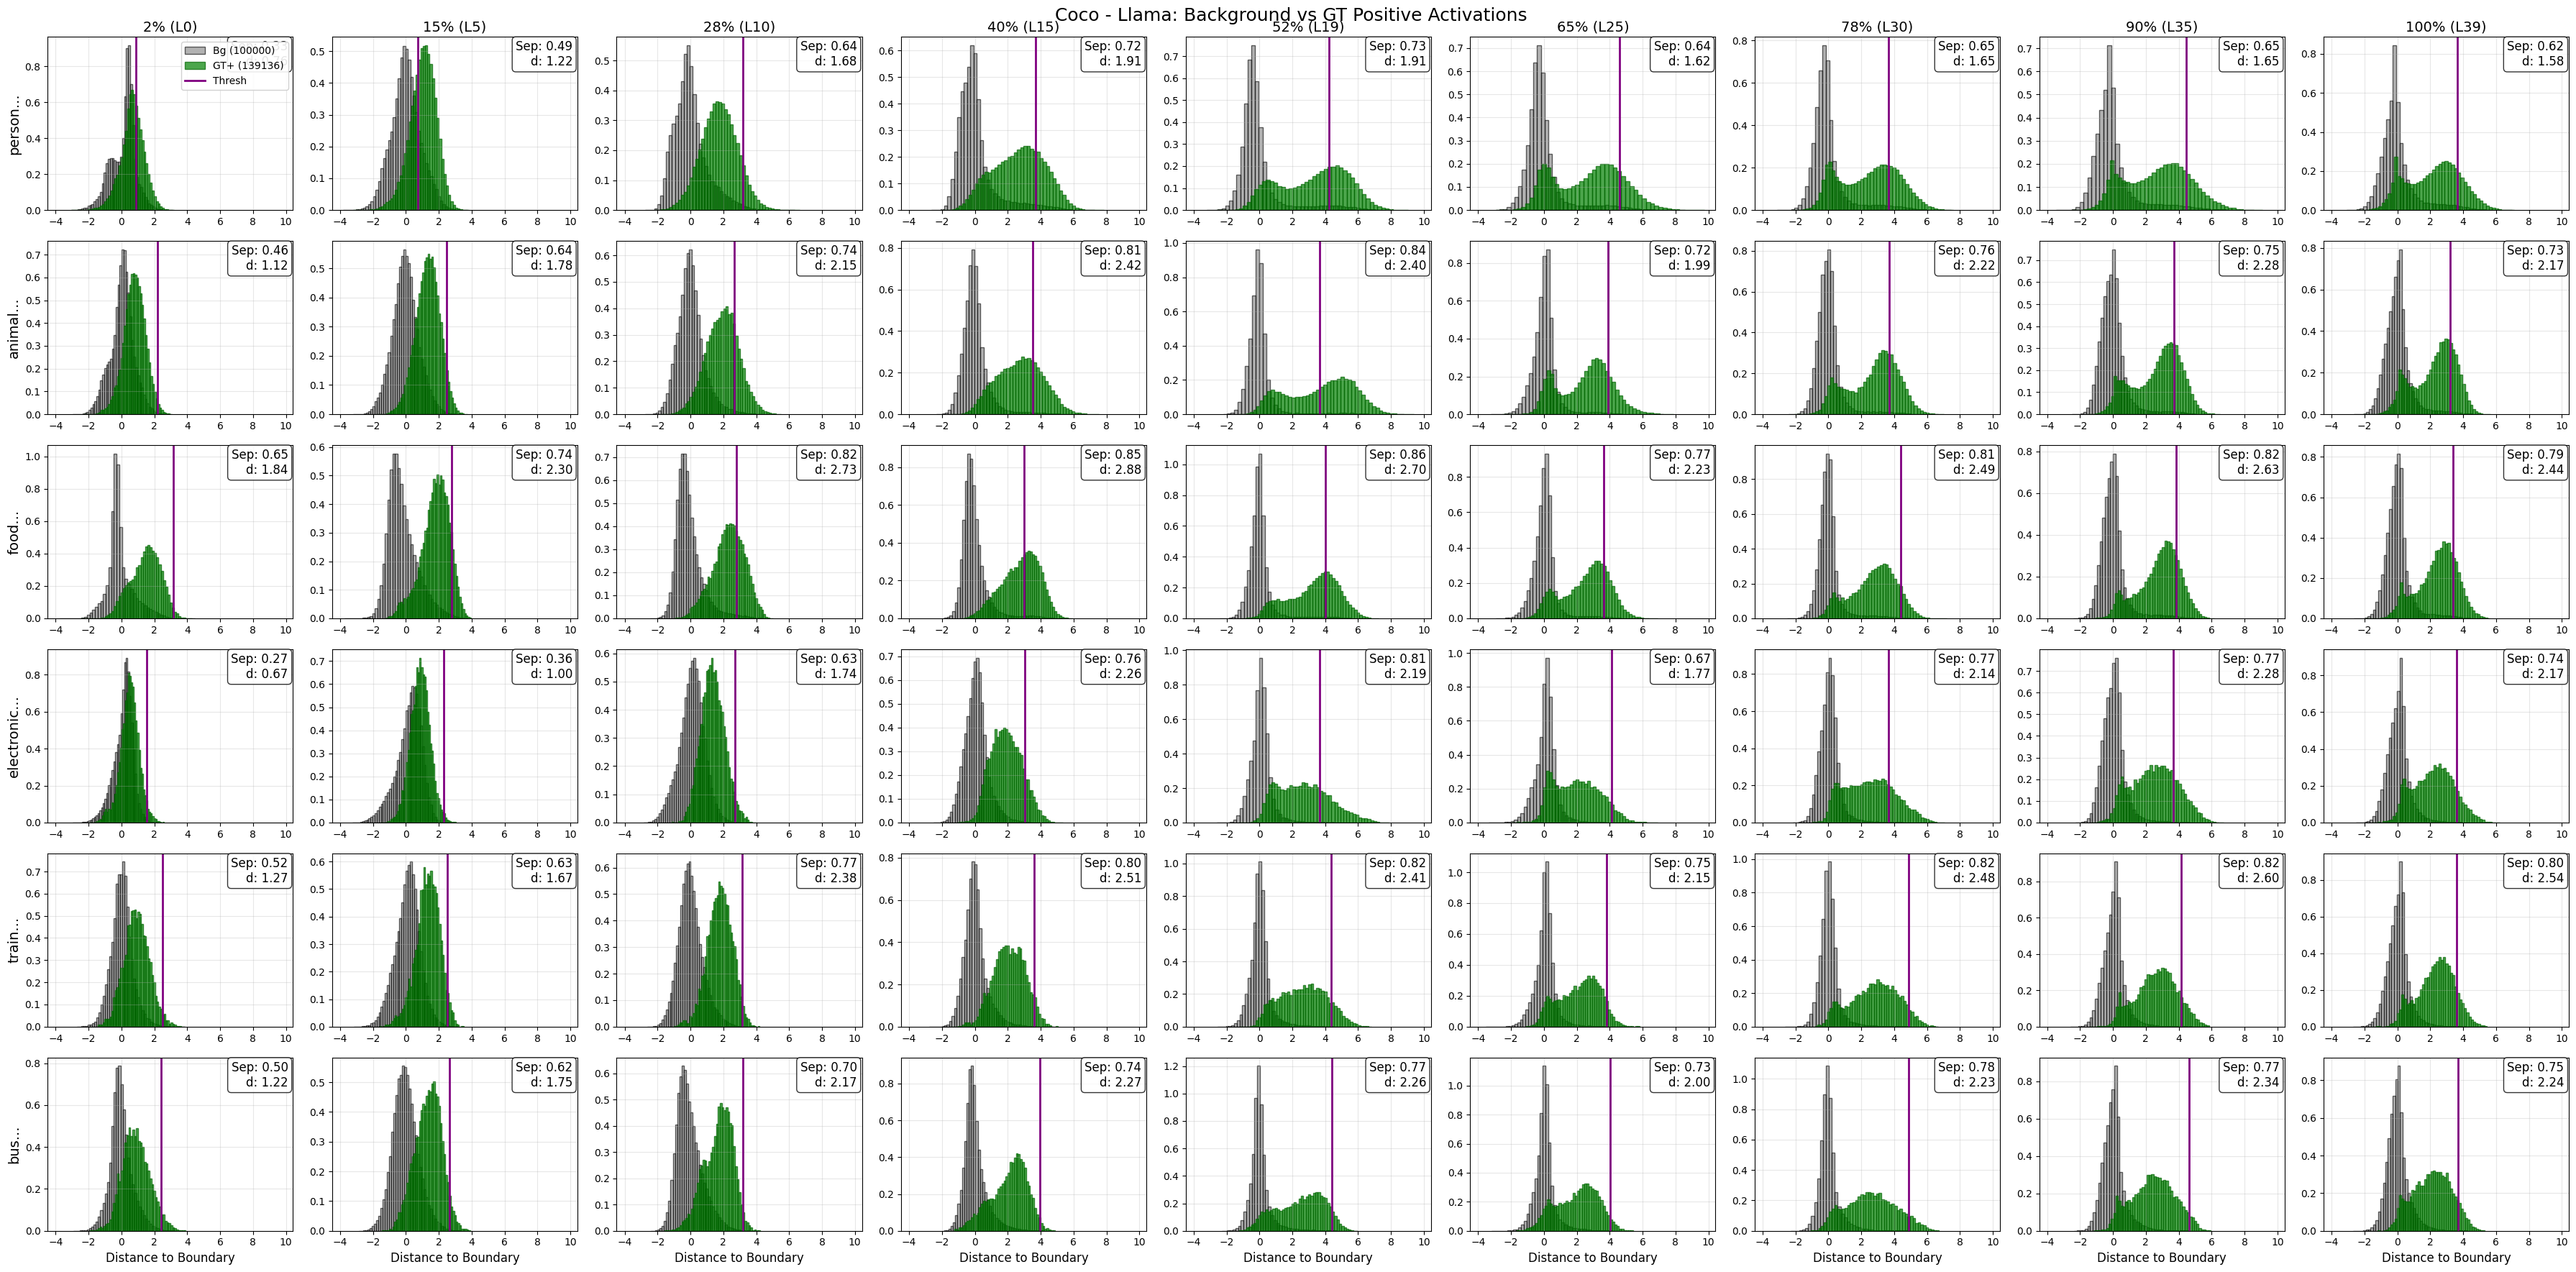

In [5]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import plot_concept_activation_grid

# Plot grid for multiple concepts across all default percentthrumodels
results = plot_concept_activation_grid(
  concepts=curr_concepts,
  dataset_name=DATASET_NAME,
  model_name=MODEL_NAME,
  concept_type=CONCEPT_TYPE,
  model_input_size=MODEL_INPUT_SIZE,
  scratch_dir=SCRATCH_DIR,
  save_path=None
)

## Plot Separation Between Background + GT over layers

In [6]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import compute_separation_over_percentthru

results = compute_separation_over_percentthru(
      dataset_name=DATASET_NAME,
      model_name=MODEL_NAME,
      concept_type=CONCEPT_TYPE,
      metrics_to_plot=['separability', 'auc'],
      scratch_dir=SCRATCH_DIR,
      model_input_size=MODEL_INPUT_SIZE,
      compute_superdetector_separation=False,
      background_percentile=0.995  # Use 99th percentile of background as threshold
  )

ImportError: cannot import name 'compute_separation_over_percentthru' from 'utils.activation_distributions_utils' (/path/to/concept_inversion/Experiments/utils/activation_distributions_utils.py)

In [ ]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import plot_separation_results

plot_separation_results(
      averaged_results=results,
      dataset_name=DATASET_NAME,
      model_name=MODEL_NAME,
      concept_type=CONCEPT_TYPE,
      metrics_to_plot=['auc'],
      save_path='../Figs/Paper_Figs/coco_llama_separability_across_layers.pdf'  ,
      compute_superdetector_separation=False,
      background_percentile=0.995,  # Use 99th percentile of background as threshold
      figsize=(2.75, 2),
      use_layer_numbers=False,
      label_size=9,
      show_title=True,
      custom_ylabel="",
      custom_title='AUC-ROC for True-Concept\n and Background Activations' 
  )

# Distributions

## Plot Distributions on Specific Sample

/path/to/concept_inversion/Experiments/utils/activation_distributions_utils.py:2435: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) DejaVu Serif.
  bbox = token_text.get_window_extent(renderer=renderer)
/path/to/concept_inversion/Experiments/utils/activation_distributions_utils.py:2613: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.97])


Loaded detection threshold for 'anger': 2.367

Token-level analysis for 'anger':
- Total tokens: 26
- Tokens WITH target concept: 5
- Tokens WITH other concepts: 0
- Tokens WITH no concepts: 21
- Activation range: [-0.338, 2.587]


/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)


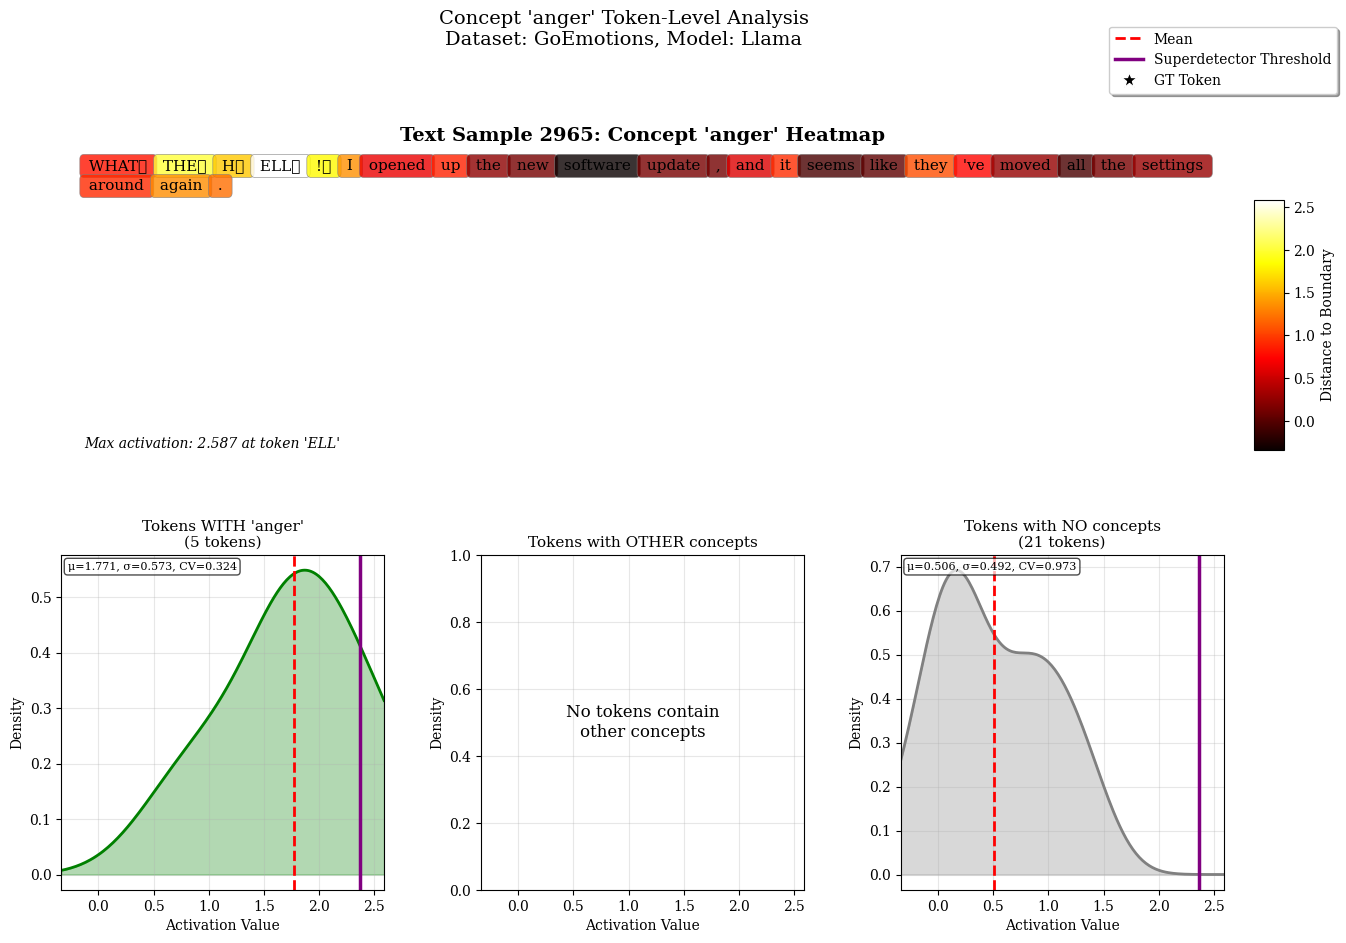

In [227]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import analyze_image_concept_activations

# 390 806 # 518, 1054, 2842, for paper 4327 next 
img_idx=2965

fig = analyze_image_concept_activations(
      image_idx=img_idx,      # Global image index
      concept=concept,      # The concept you want to analyze
      dataset_name=DATASET_NAME,
      model_name=MODEL_NAME,
      concept_type=CONCEPT_TYPE,
      scratch_dir=SCRATCH_DIR,
      save_path=None  # Optional
  )

## Plot Distributions Over Datset

Using device: cuda
Loading ground truth from: GT_Samples/Broden-OpenSurfaces/gt_samples_per_concept_test_inputsize_(560, 560).pt
Loading patch-level ground truth from: GT_Samples/Broden-OpenSurfaces/gt_patches_per_concept_inputsize_(560, 560).pt
Loading all test activations...
Found 743 test samples
Analyzing 743 test images (1188800 patches)
Building patch masks with vectorized operations...
Loading pre-computed padding mask...

METRICS EXPLANATION:
n     = number of patchs
μ     = mean activation value
σ     = standard deviation (spread of the distribution)
IQR   = interquartile range (75th - 25th percentile)

VISUAL INDICATORS:
Red dashed line   = mean value
Purple solid line = superdetector threshold

Loaded detection thresholds from Best_Detection_Percentiles_Cal/Broden-OpenSurfaces/best_percentiles_Llama_linsep_patch_embeddings_BD_True_BN_False_percentthrumodel_100.pt

Processing concept: material::mirror
Patch counts for 'material::mirror':
  1. Patchs WITH concept: 5817
  2. OT

/path/to/concept_inversion/Experiments/utils/activation_distributions_utils.py:3147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


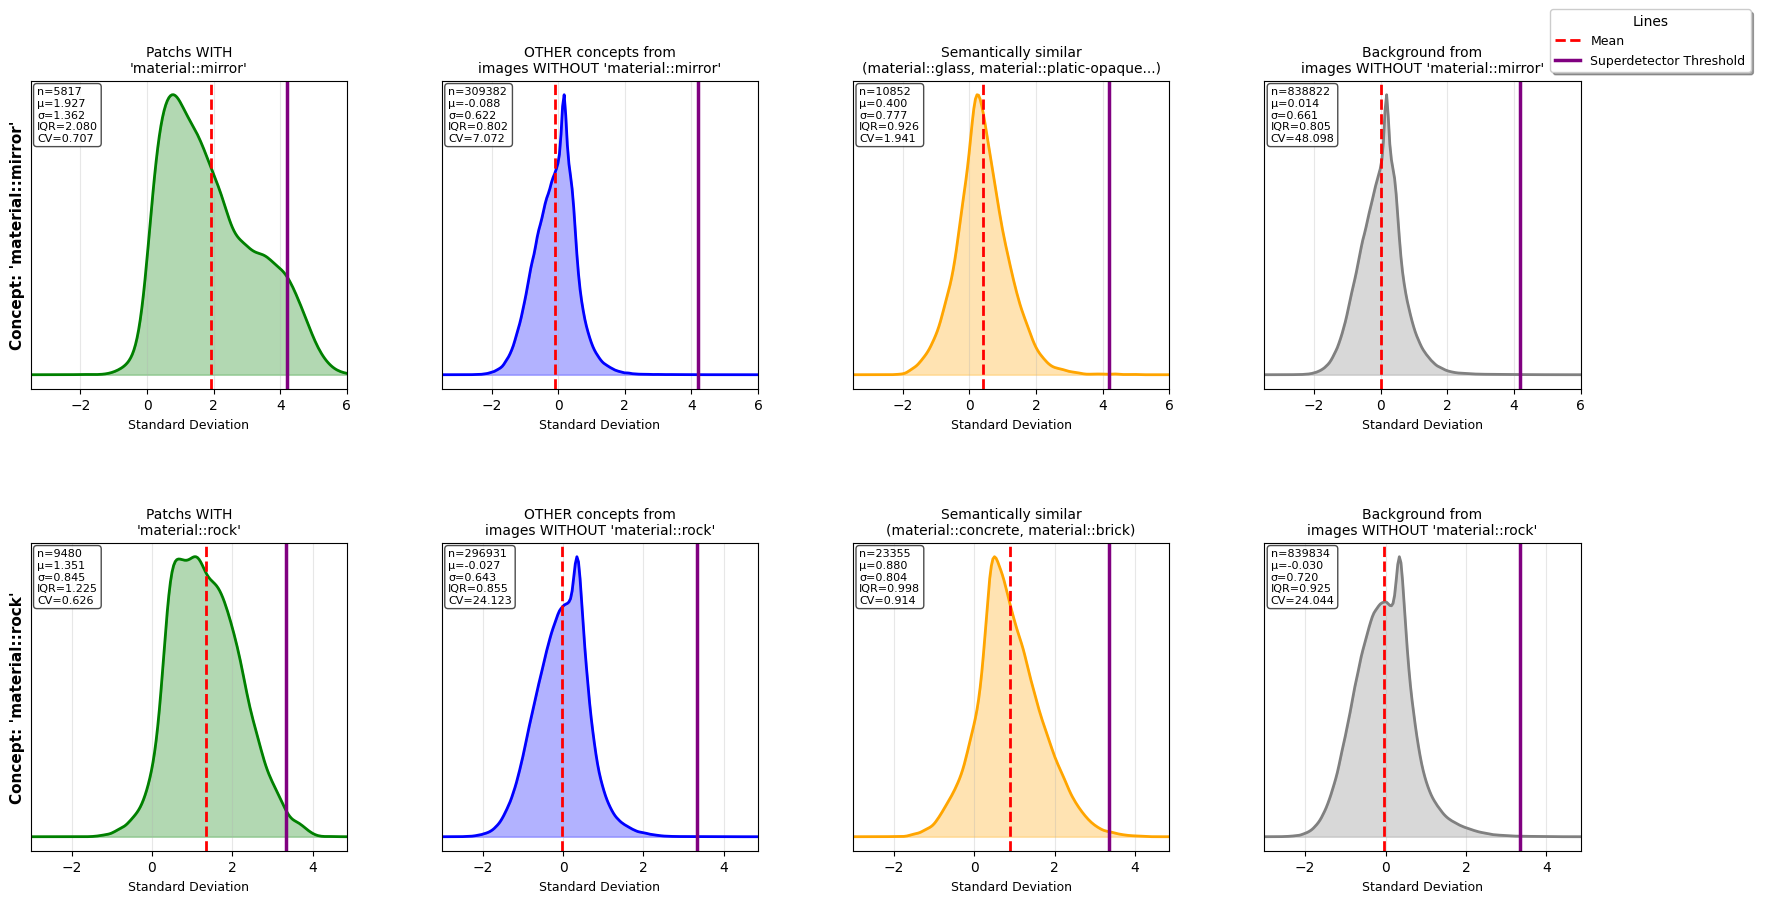

In [231]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import analyze_concept_activations_global

fig = analyze_concept_activations_global(
          concepts=concepts, 
          sim_concepts=sim_concepts,
          dataset_name=DATASET_NAME,
          model_name=MODEL_NAME,
          concept_type=CONCEPT_TYPE,
          scratch_dir=SCRATCH_DIR,
      save_path=None
    )

## STD Per Sample Distribution

Loading ground truth from: GT_Samples/Coco/gt_samples_per_concept_test_inputsize_(560, 560).pt


/path/to/concept_inversion/Experiments/utils/activation_distributions_utils.py:3286: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gt_samples_per_concept = torch.load(gt_fil


Processing concept 'bench'...
  Samples with 'bench': 54
  Samples without 'bench': 5446
  Computing stds for samples with target concept...


Target batches: 100% 2/2 [00:02<00:00,  1.30s/it]


  Computing stds for samples without target concept...
  Processing other concepts samples (826 samples)...


other concepts batches: 100% 10/10 [00:12<00:00,  1.30s/it]


  Processing similar concepts samples (112 samples)...


similar concepts batches: 100% 3/3 [00:03<00:00,  1.29s/it]


  Processing background samples (4508 samples)...


background batches: 100% 10/10 [00:12<00:00,  1.30s/it]



Processing concept 'animal'...
  Samples with 'animal': 202
  Samples without 'animal': 5298
  Computing stds for samples with target concept...


Target batches: 100% 5/5 [00:06<00:00,  1.31s/it]


  Computing stds for samples without target concept...
  Processing other concepts samples (316 samples)...


other concepts batches: 100% 7/7 [00:09<00:00,  1.31s/it]


  Processing similar concepts samples (474 samples)...


similar concepts batches: 100% 10/10 [00:13<00:00,  1.31s/it]


  Processing background samples (4508 samples)...


background batches: 100% 10/10 [00:13<00:00,  1.31s/it]



Processing concept 'car'...
  Samples with 'car': 112
  Samples without 'car': 5388
  Computing stds for samples with target concept...


Target batches: 100% 3/3 [00:03<00:00,  1.28s/it]


  Computing stds for samples without target concept...
  Processing other concepts samples (814 samples)...


other concepts batches: 100% 10/10 [00:12<00:00,  1.28s/it]


  Processing similar concepts samples (66 samples)...


similar concepts batches: 100% 2/2 [00:02<00:00,  1.28s/it]


  Processing background samples (4508 samples)...


background batches: 100% 10/10 [00:12<00:00,  1.28s/it]
/path/to/concept_inversion/Experiments/utils/activation_distributions_utils.py:3644: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


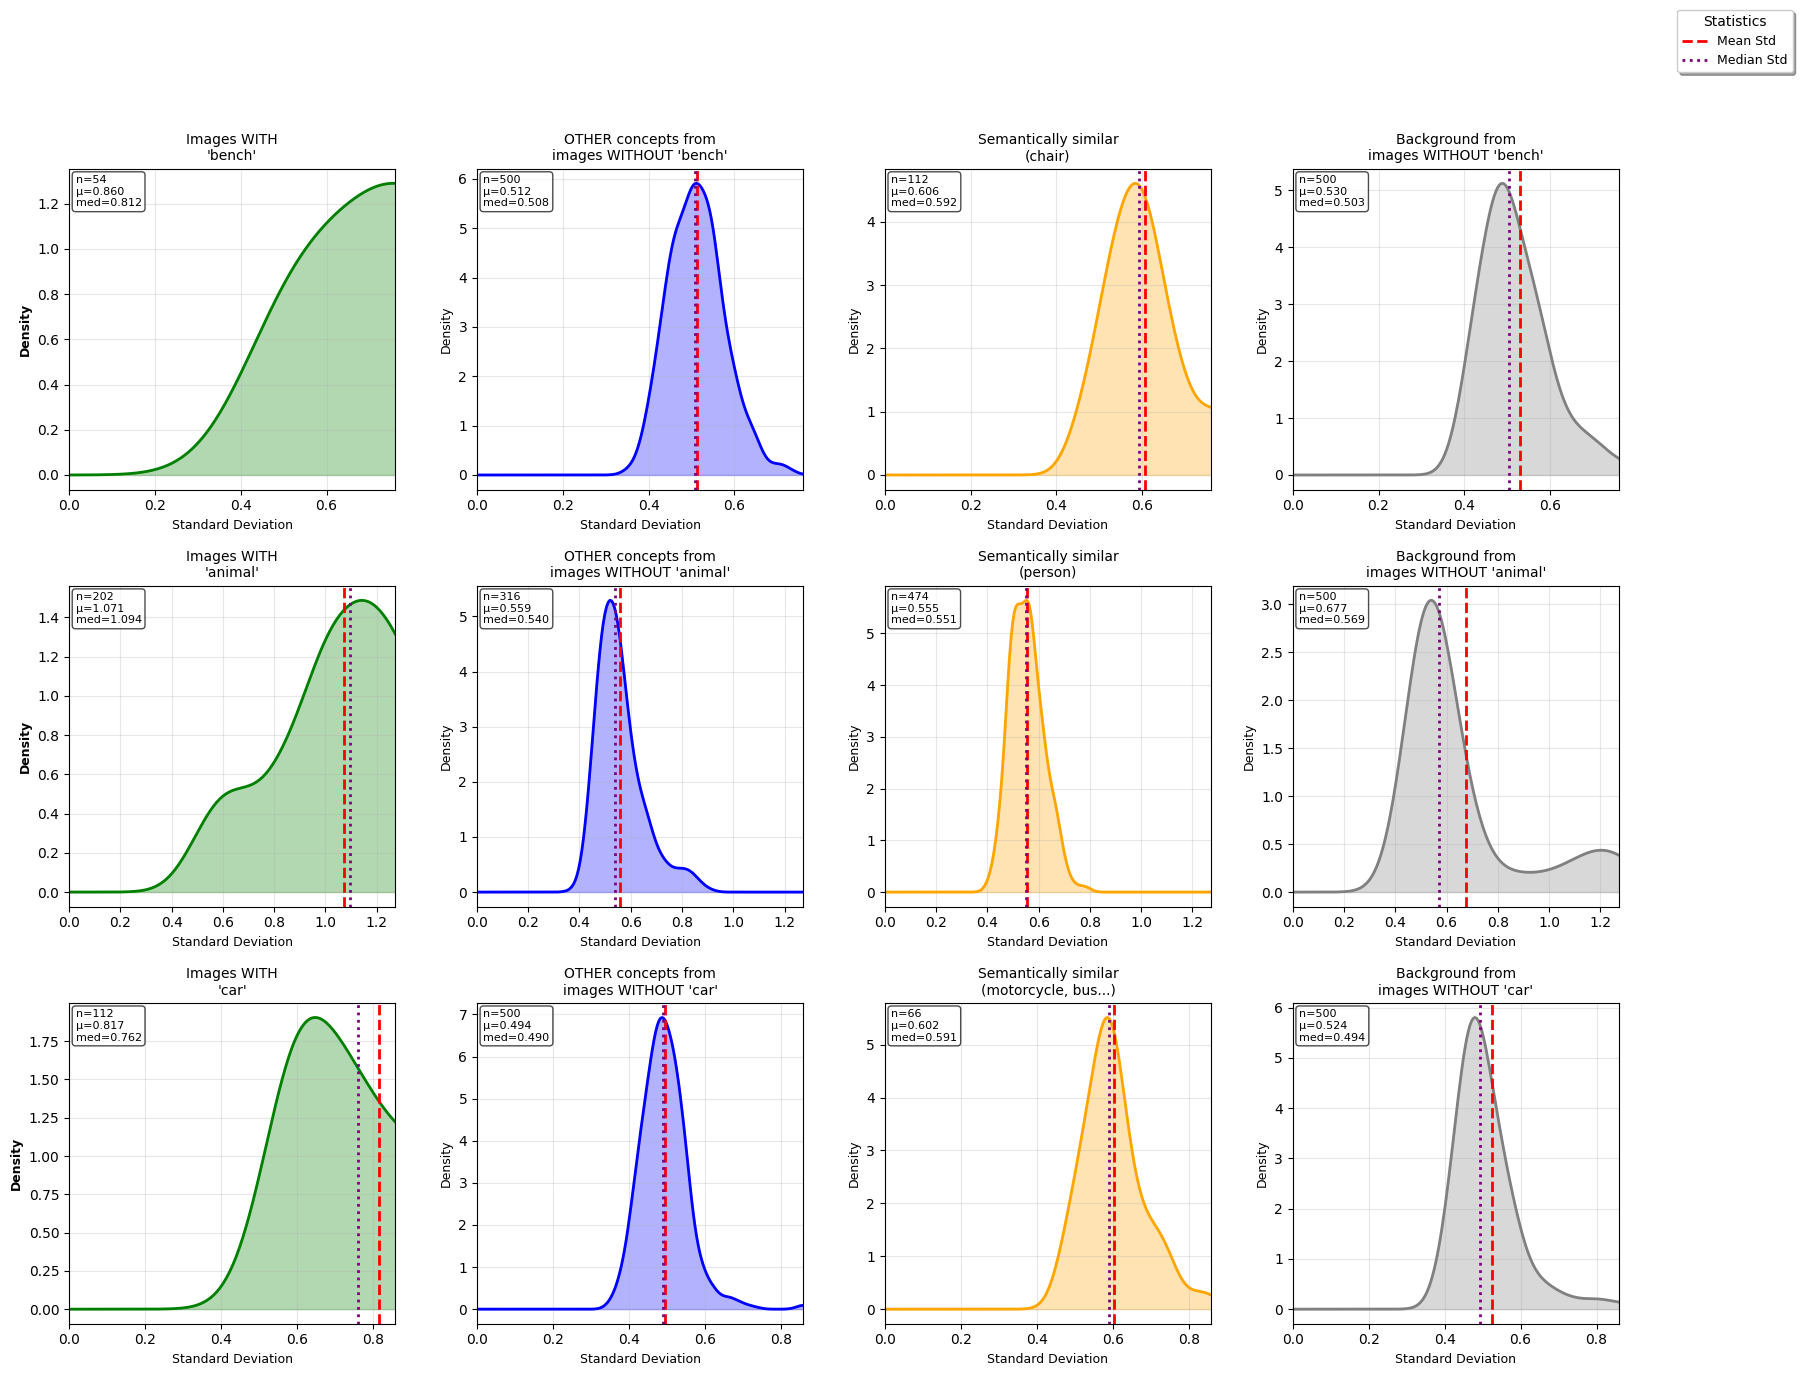

In [224]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import analyze_concept_std_distributions_global

fig = analyze_concept_std_distributions_global(
          concepts=concepts, 
          sim_concepts=sim_concepts,
          dataset_name=DATASET_NAME,
          model_name=MODEL_NAME,
          concept_type=CONCEPT_TYPE,
          scratch_dir=SCRATCH_DIR,
      save_path=None
    )

## Separate Distributions Into Two

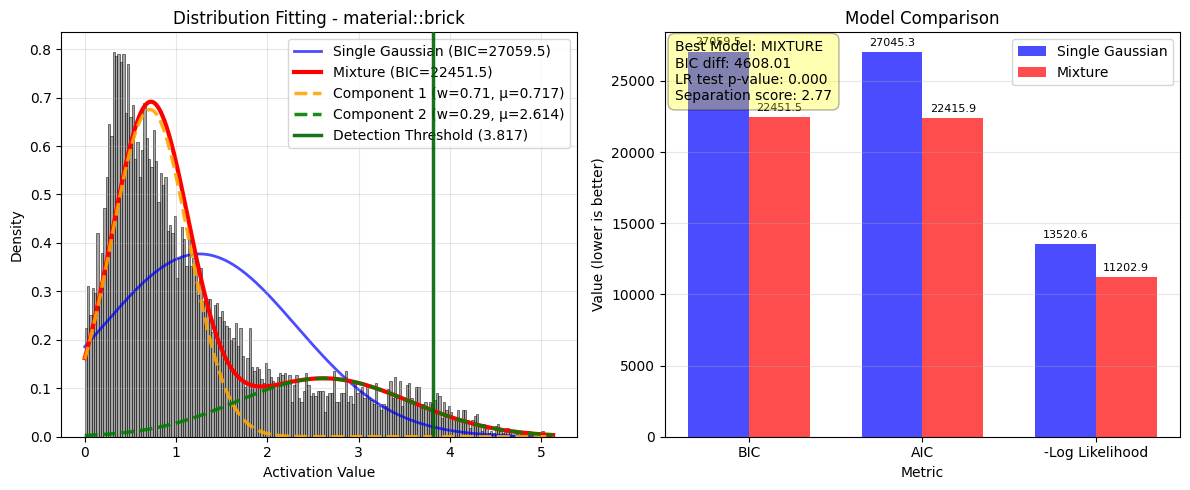

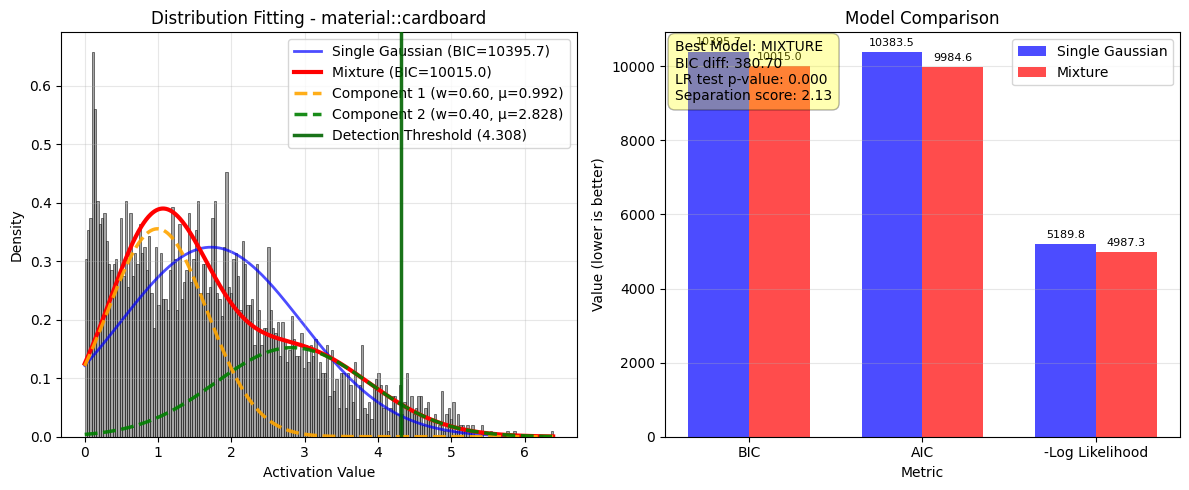

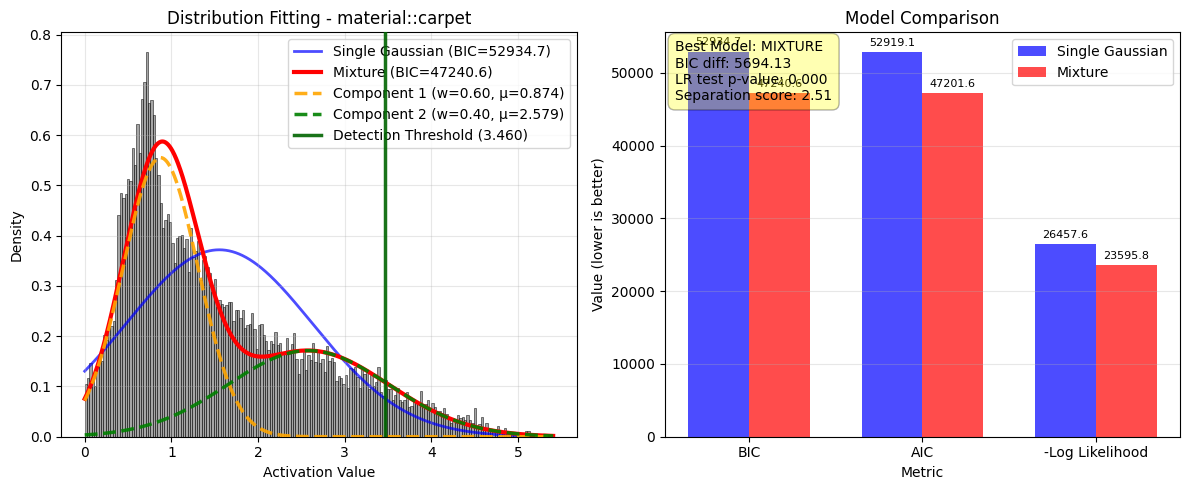

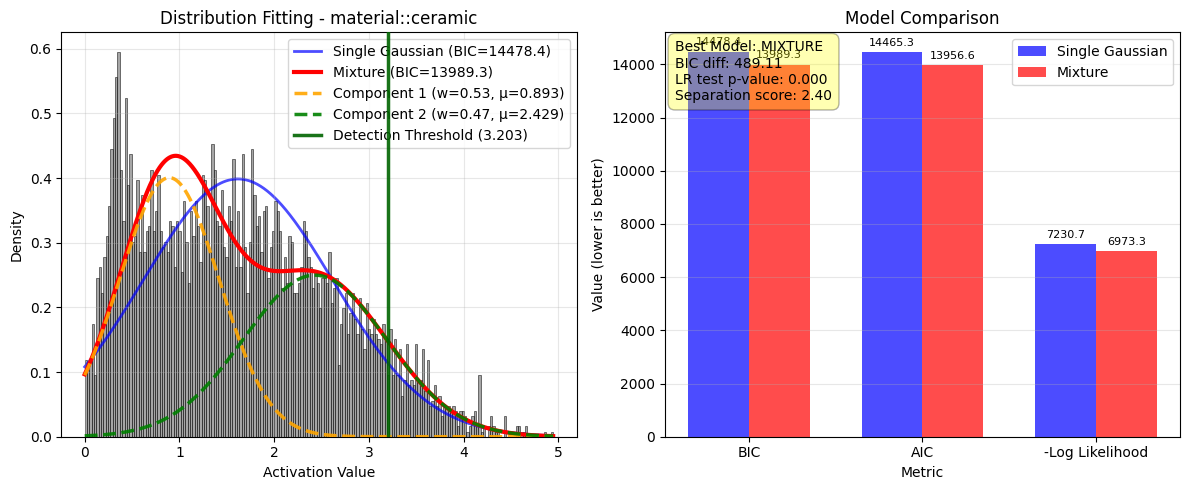

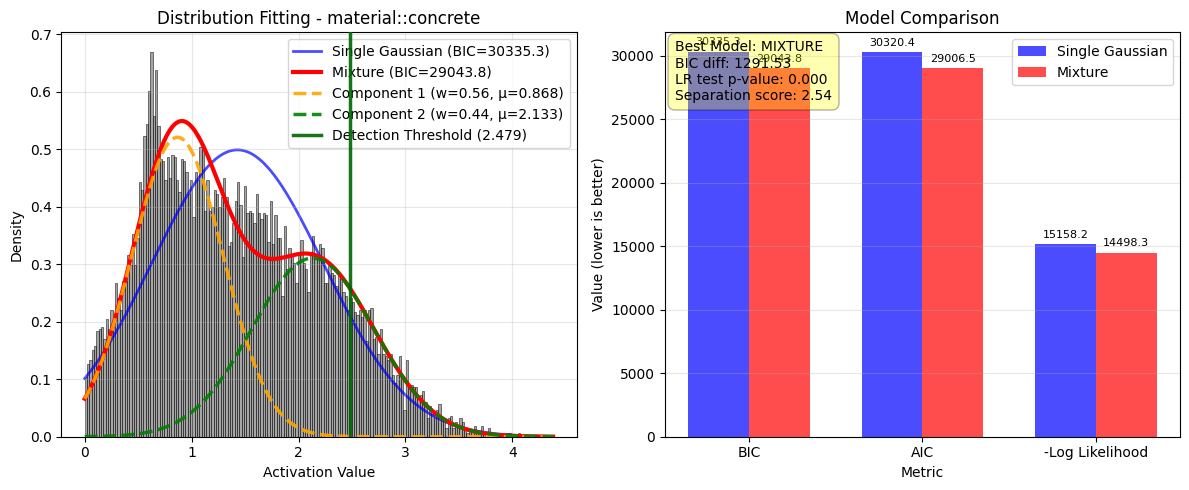

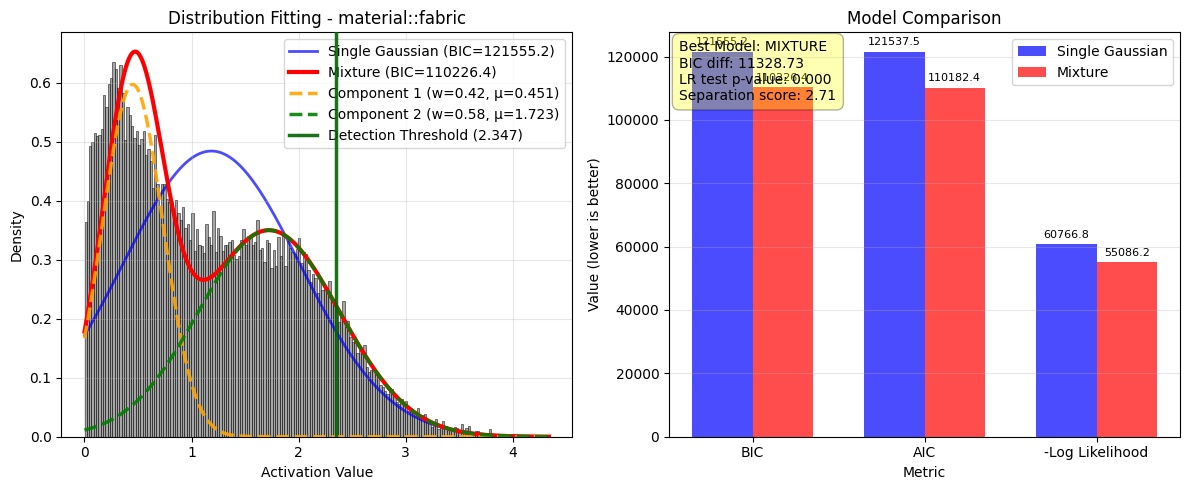

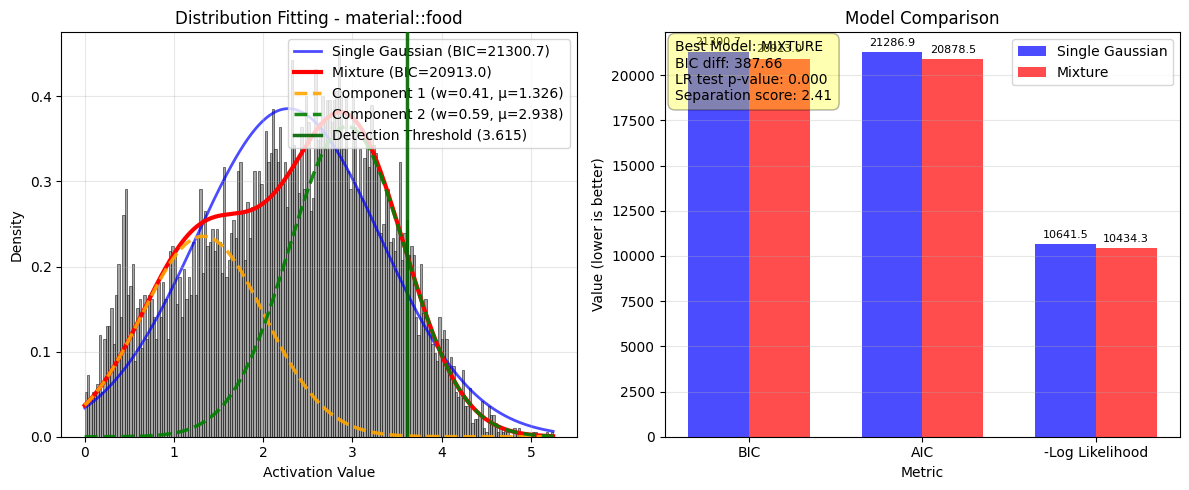

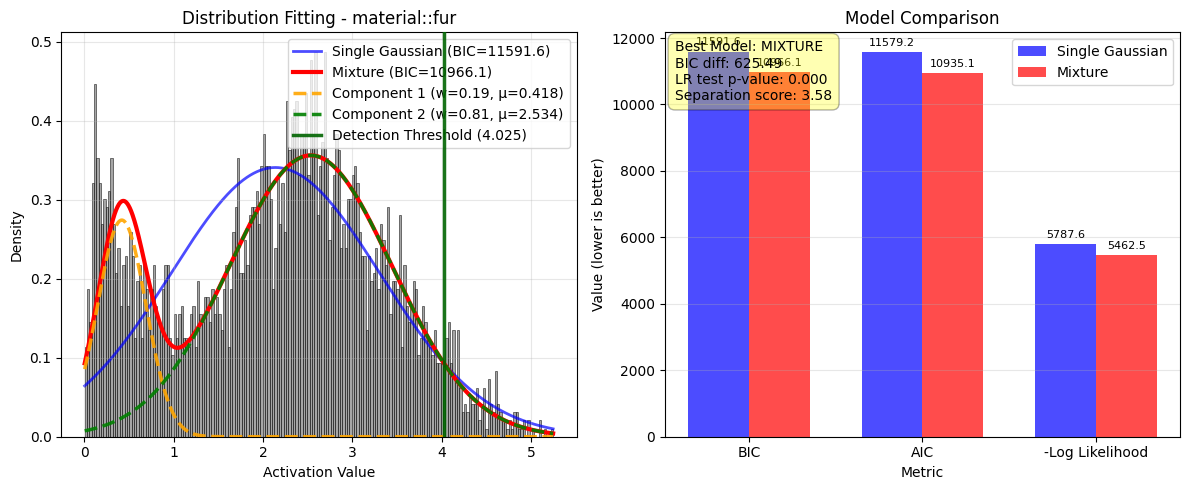

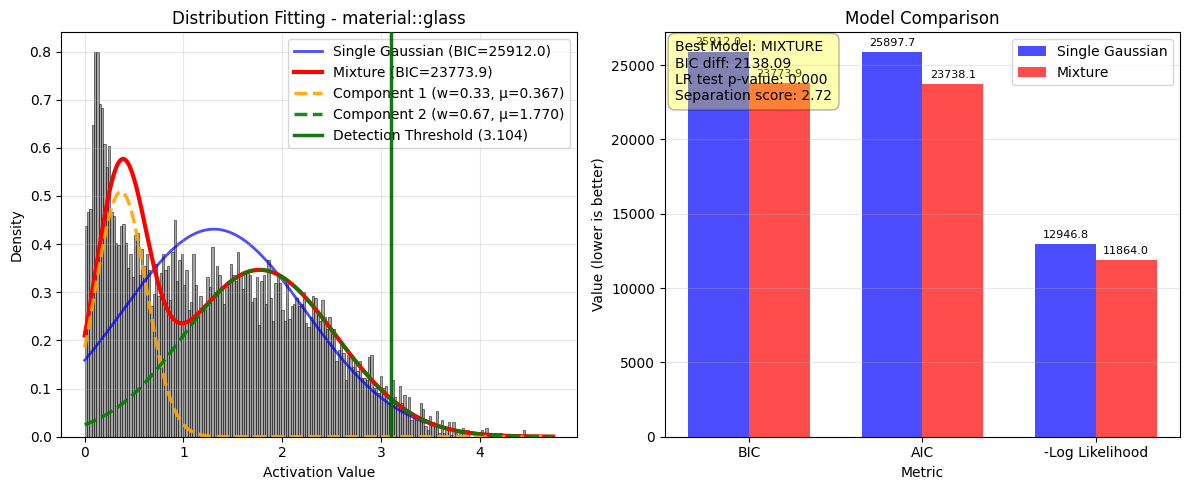

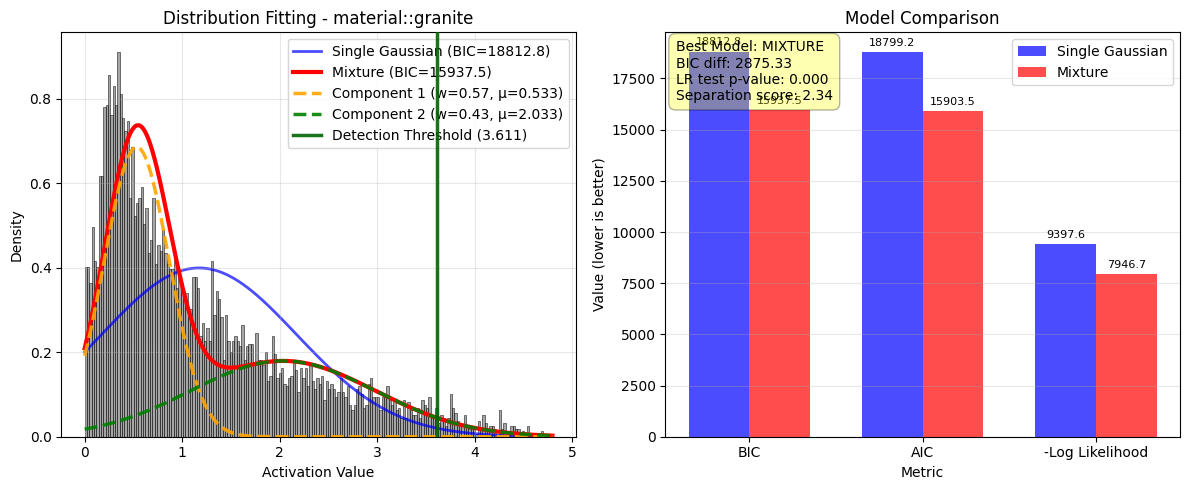

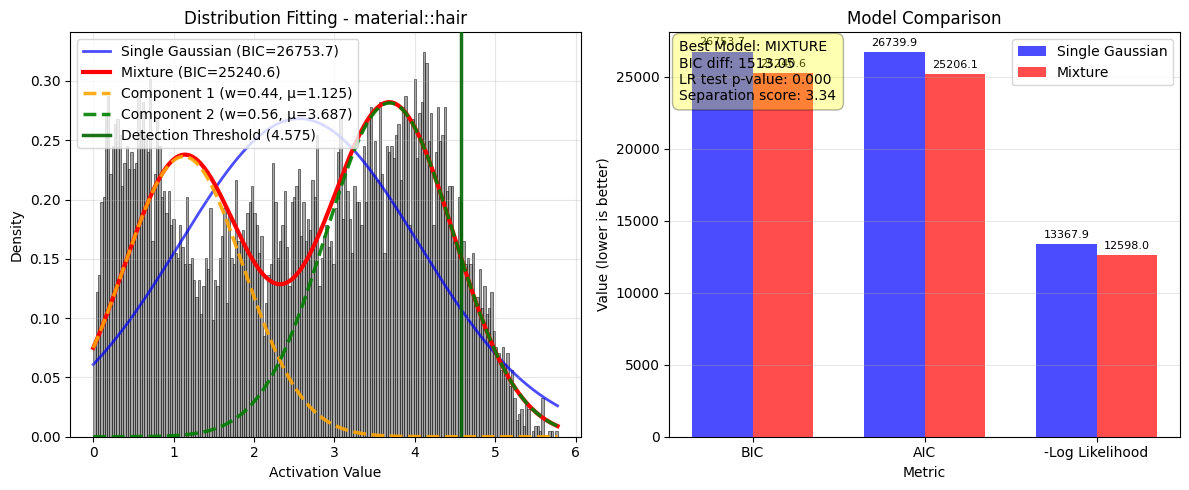

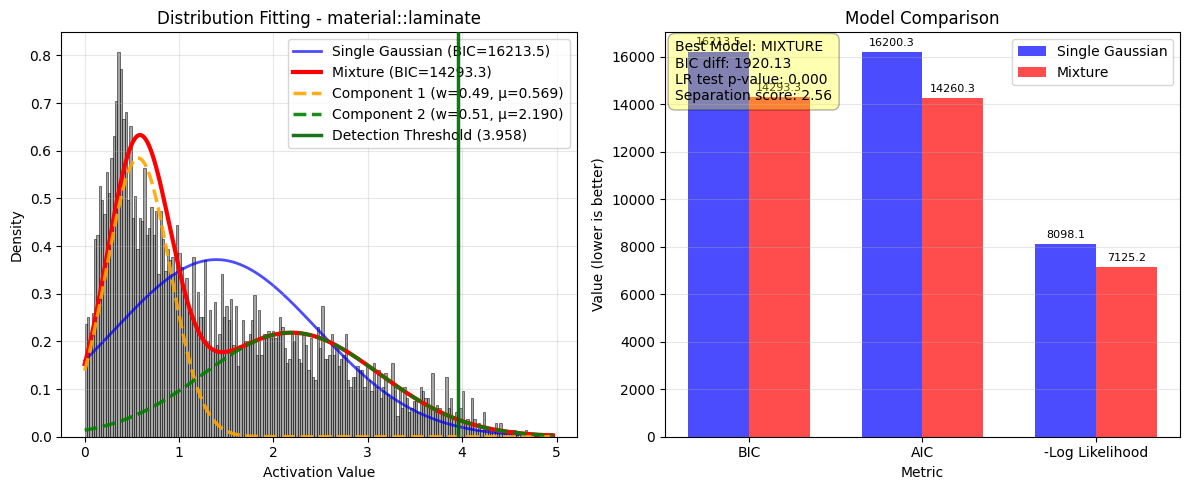

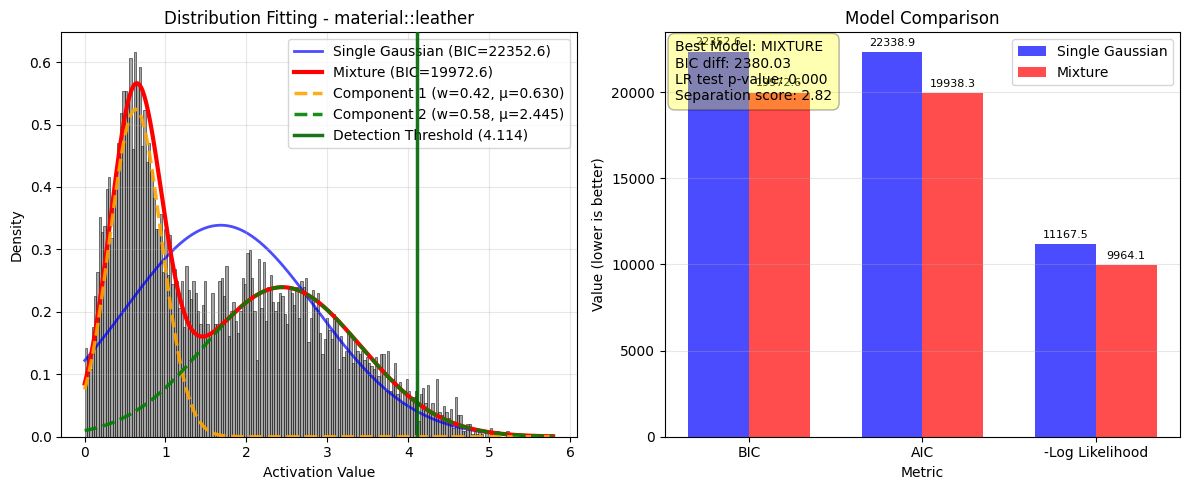

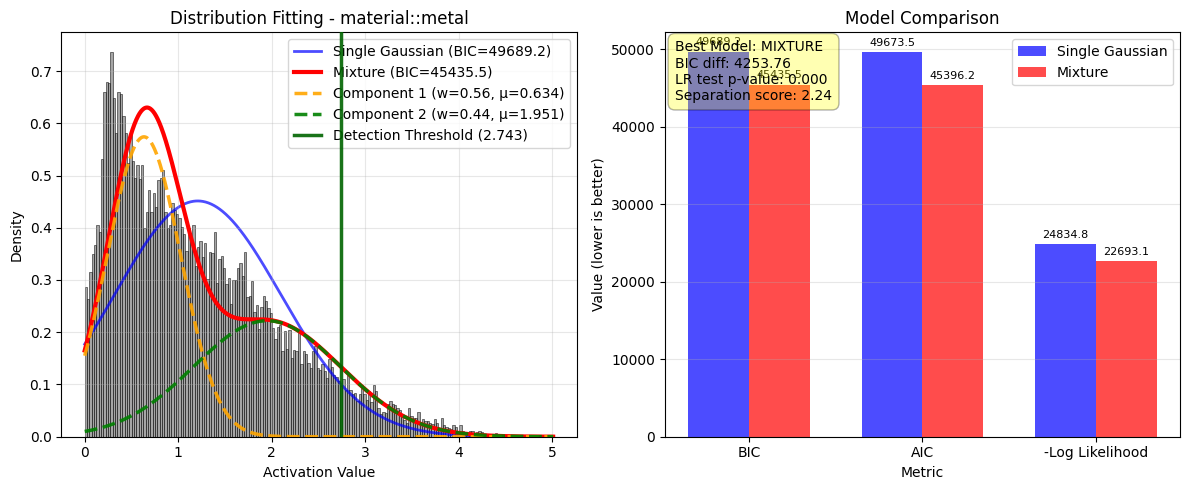

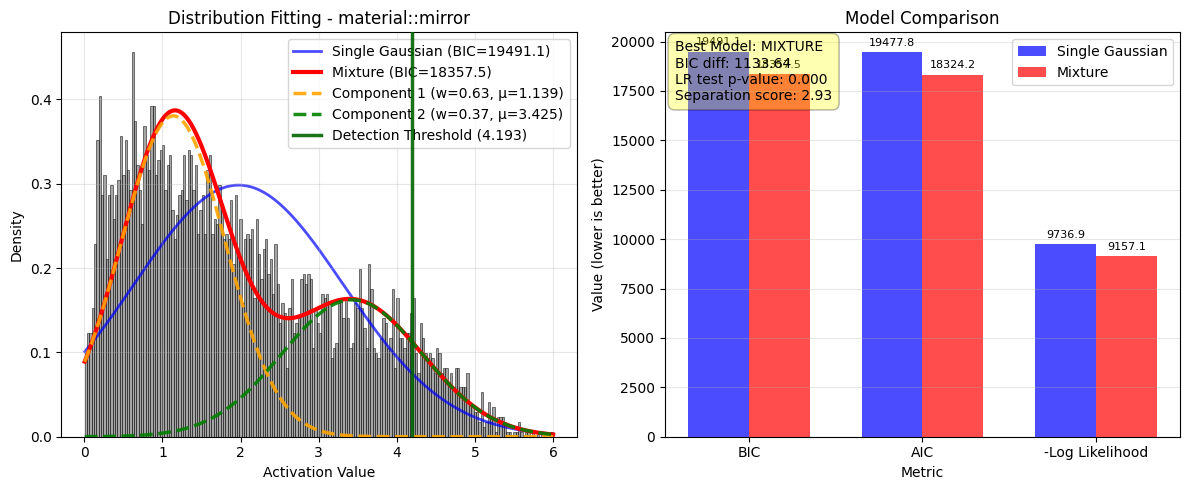

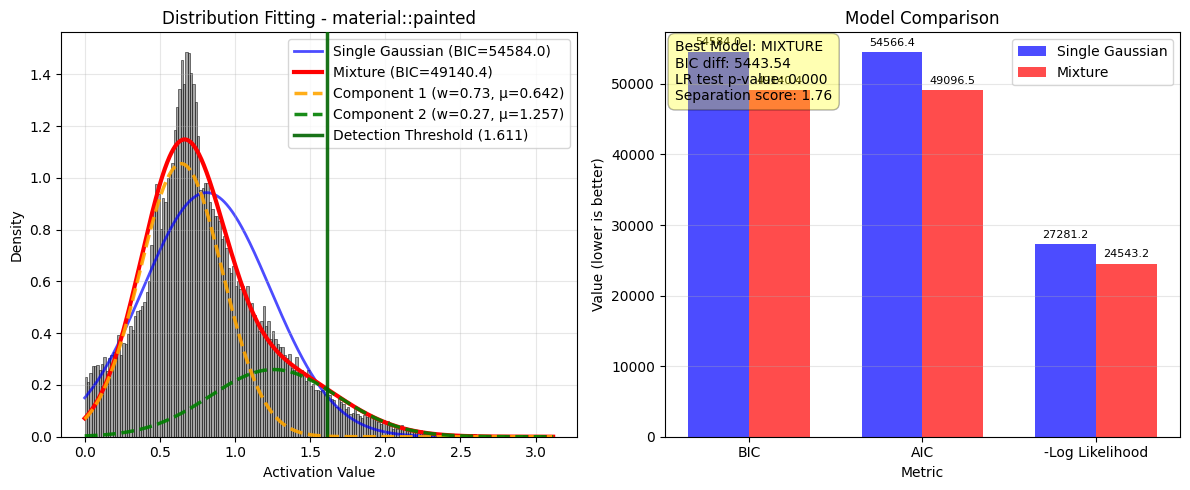

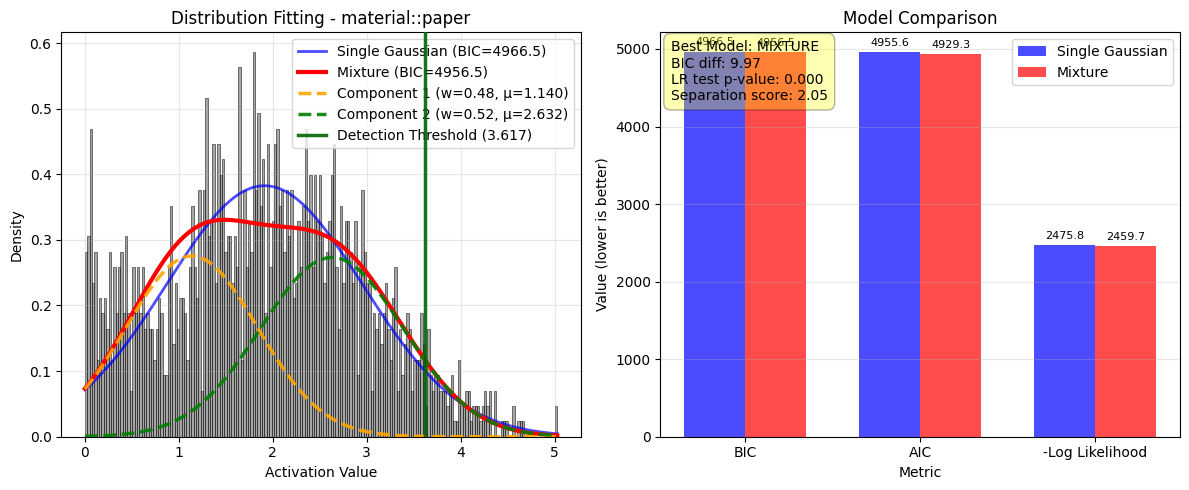

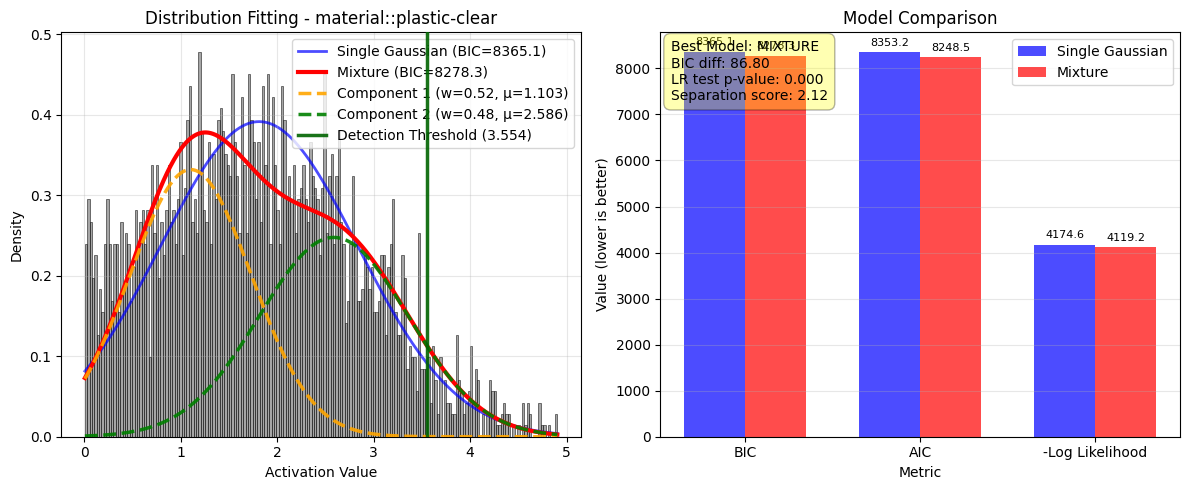

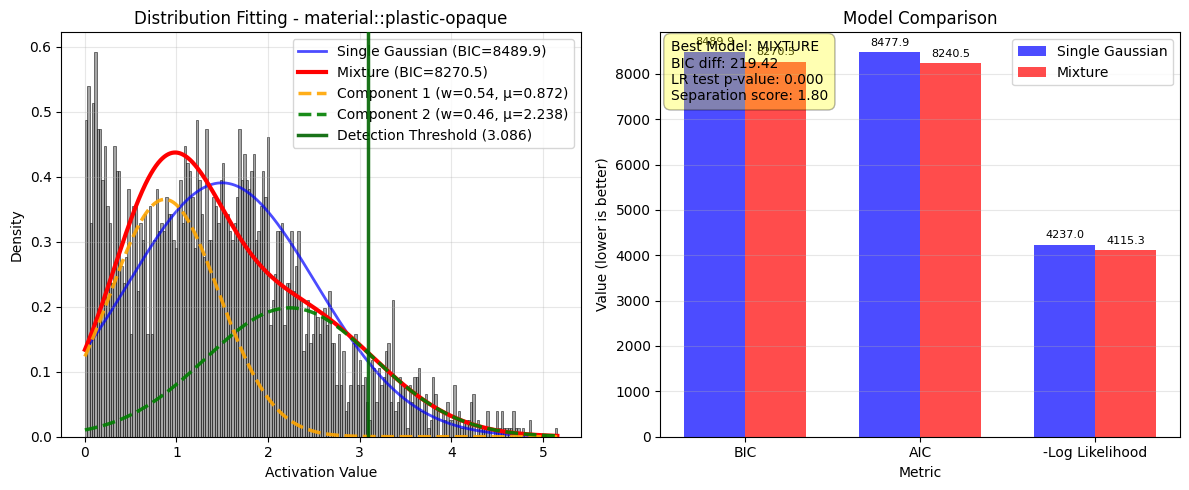

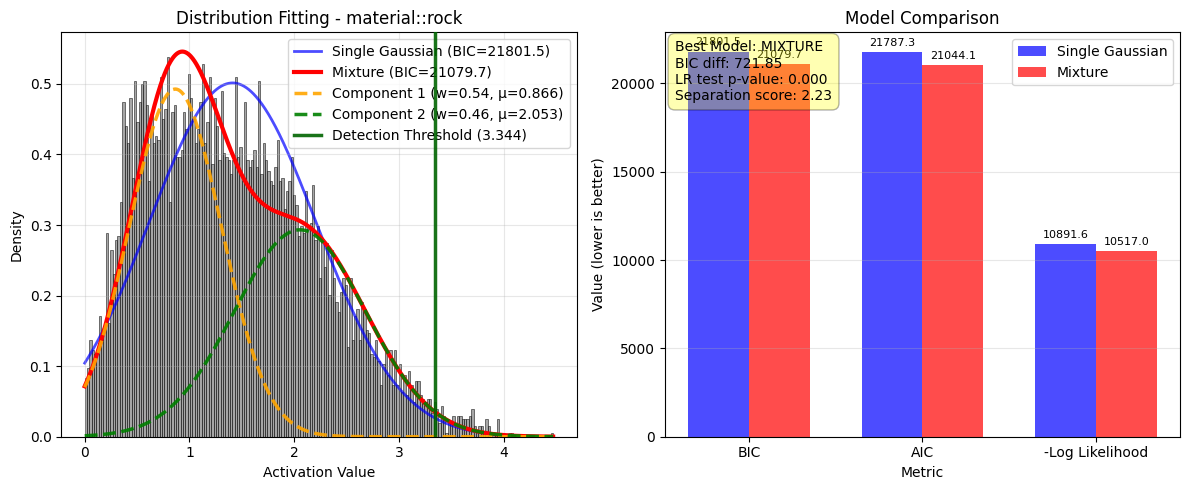

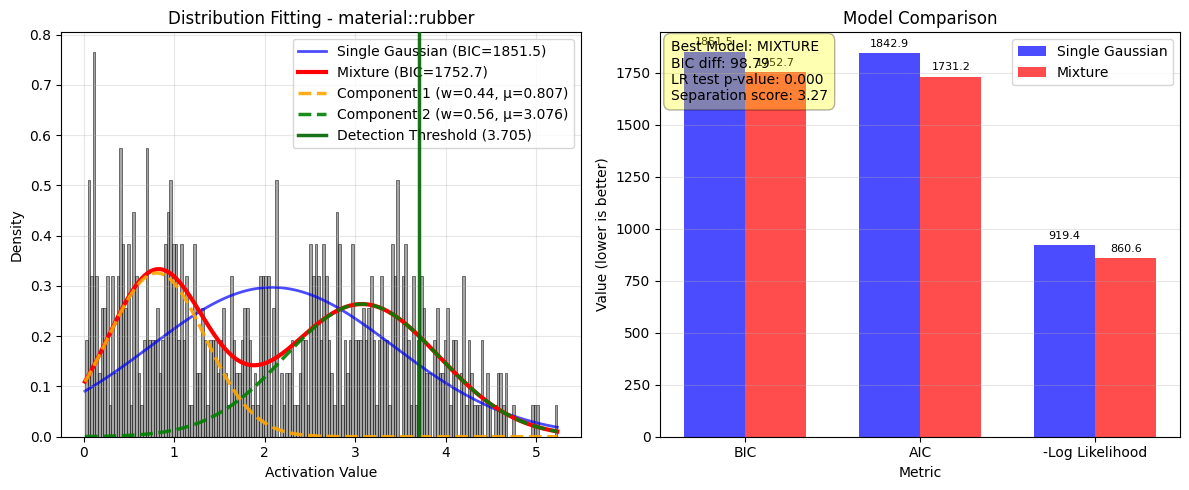

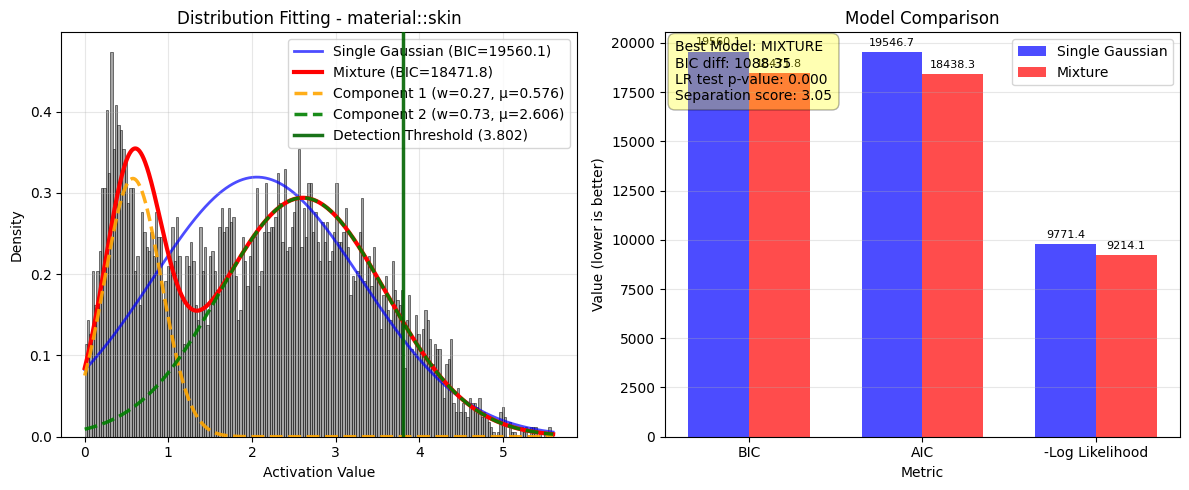

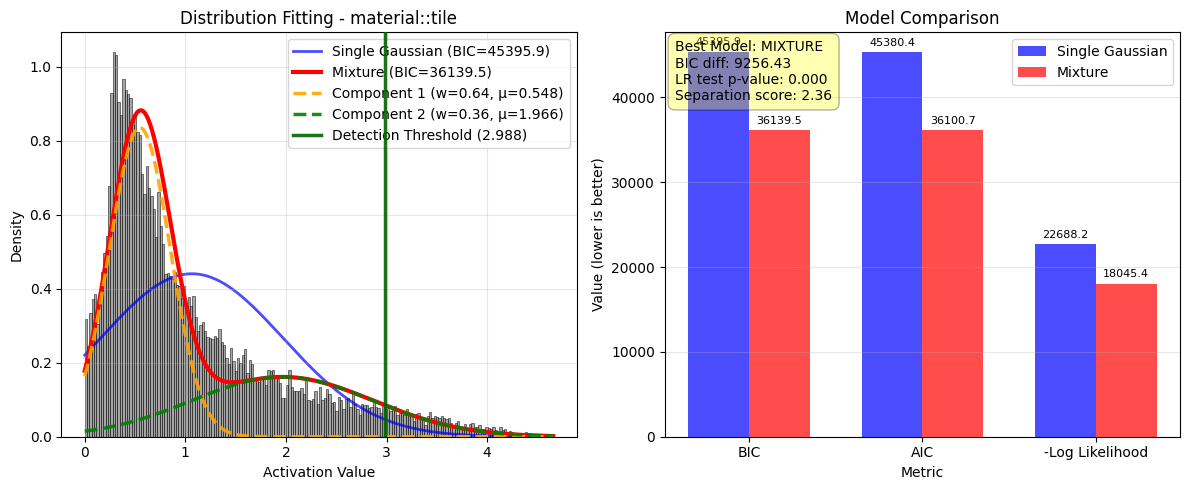

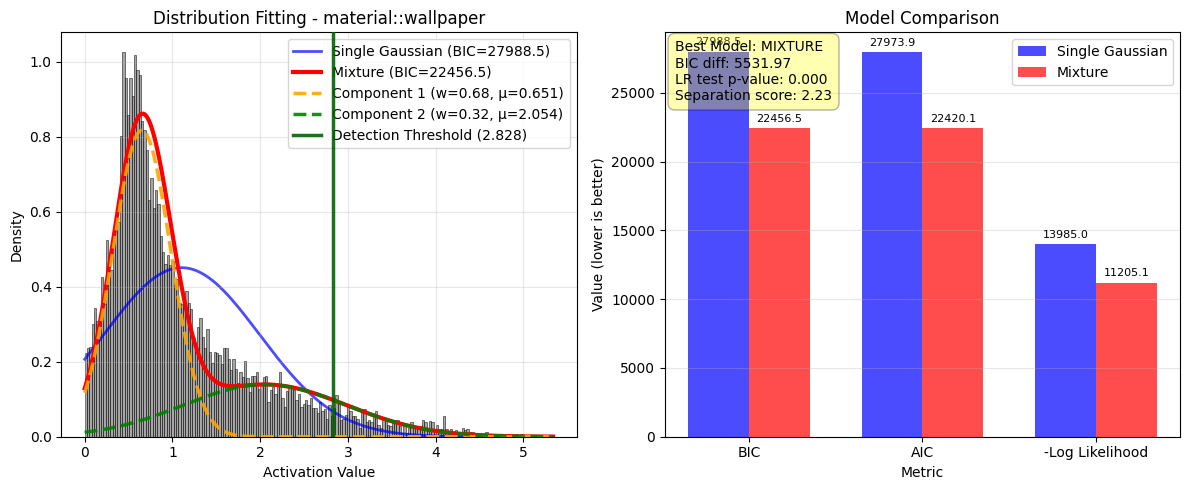

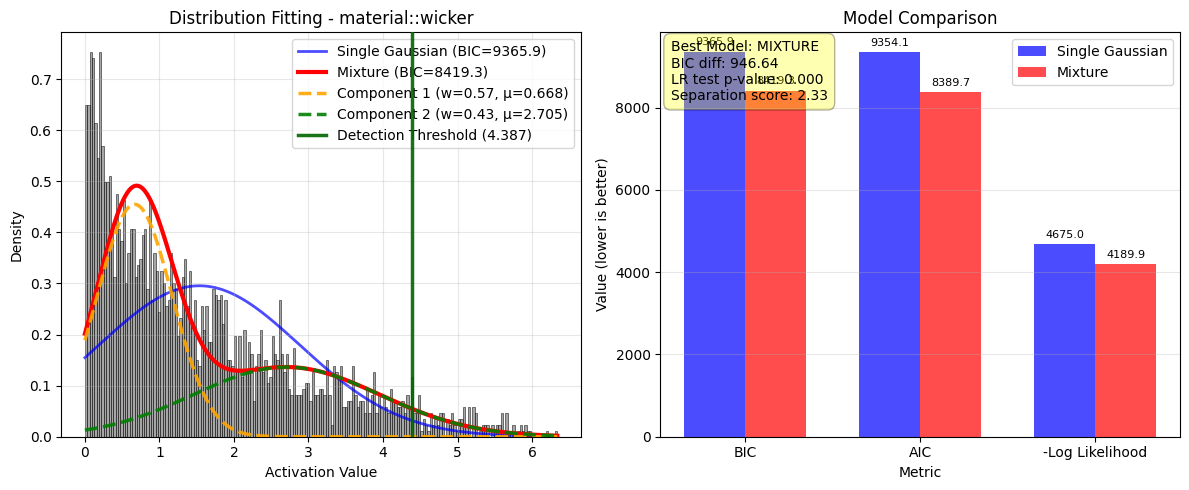

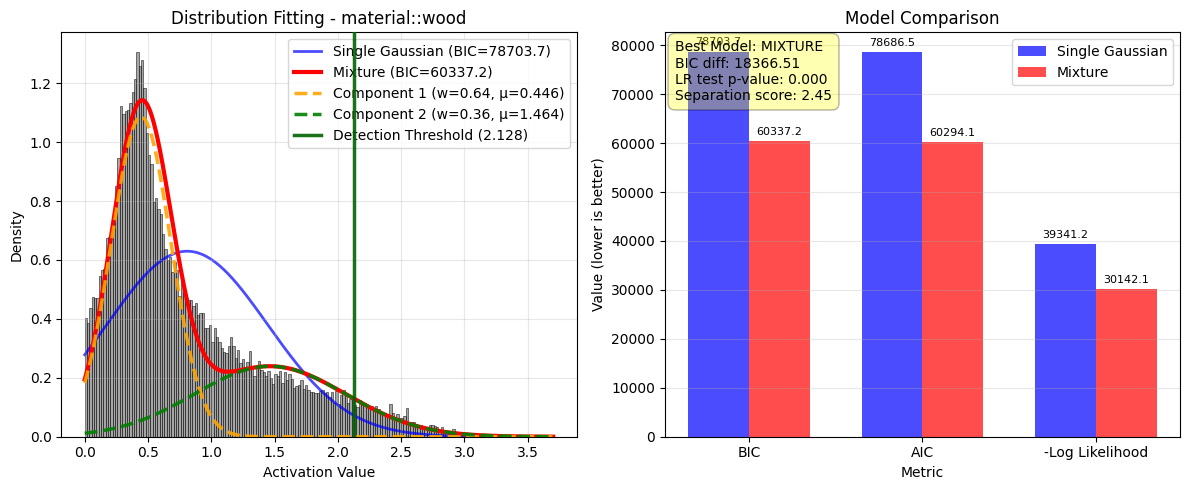

In [232]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import analyze_gaussian_mixture_for_concepts
results = analyze_gaussian_mixture_for_concepts(
  dataset_name=DATASET_NAME,
  model_name=MODEL_NAME,
  concept_type=CONCEPT_TYPE,
  percent_thru_model=100,
  concepts=None,
  scratch_dir=SCRATCH_DIR
)

## Decompose gt activation into background + something

In [ ]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import analyze_concept_activation_decomposition
results = analyze_concept_activation_decomposition(
  concepts=None,
  dataset_name=DATASET_NAME,
  model_name=MODEL_NAME,
  concept_type=CONCEPT_TYPE,
  scratch_dir=SCRATCH_DIR
)

## Compare Mixture using Background or Not


=== Starting unified mixture decomposition analysis ===
Dataset: Coco, Model: Llama
Concept type: linsep_patch_embeddings_BD_True_BN_False
Percent through model: 100

=== Starting unified mixture decomposition analysis ===
Dataset: Coco, Model: Llama
Concept type: linsep_patch_embeddings_BD_True_BN_False
Percent through model: 100

Loading ground truth data...

Using device: cuda
Loading activation file: dists_linsep_concepts_BD_True_BN_False_Llama_patch_embeddings_percentthrumodel_100.pt
Loading test activations...
Test activations shape: torch.Size([1598400, 29])

Analyzing 6 concepts: ['person', 'animal', 'food', 'electronic', 'train']...

--- Processing concept 1/6: 'person' ---
  Found 732362 positive patches
  Filtered out 396600 padding patches from background
  GT positive: 139136 samples, Background: 1037000 samples
  Running student-t mixture modeling...
  Running background + signal decomposition with empirical distribution...
    Using fast histogram approximation for 1037

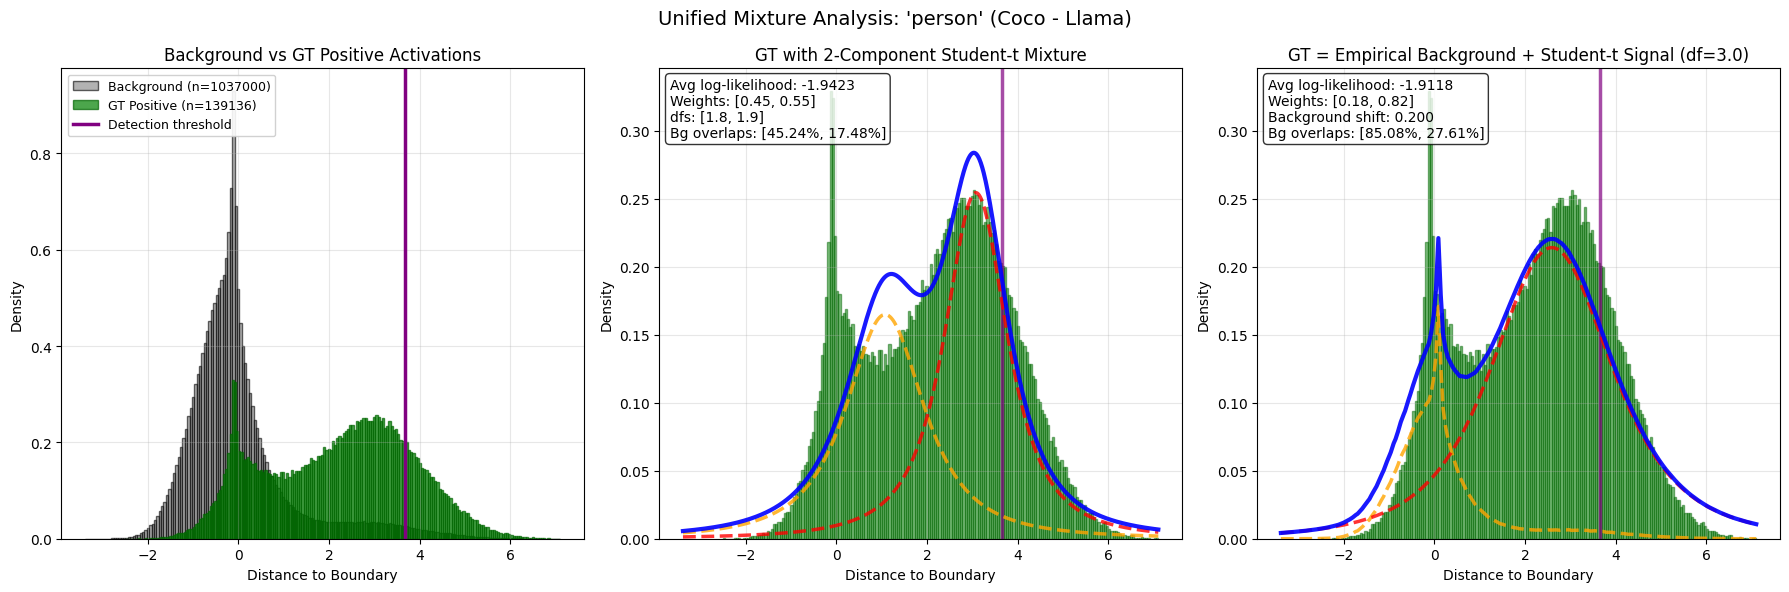


--- Processing concept 2/6: 'animal' ---
  Found 290413 positive patches
  Filtered out 422800 padding patches from background
  GT positive: 50464 samples, Background: 1102000 samples
  Running student-t mixture modeling...
  Running background + signal decomposition with empirical distribution...
    Using fast histogram approximation for 1102000 background samples...
    Finding optimal background shift...
    Optimal shift: 0.200
  Creating visualization...


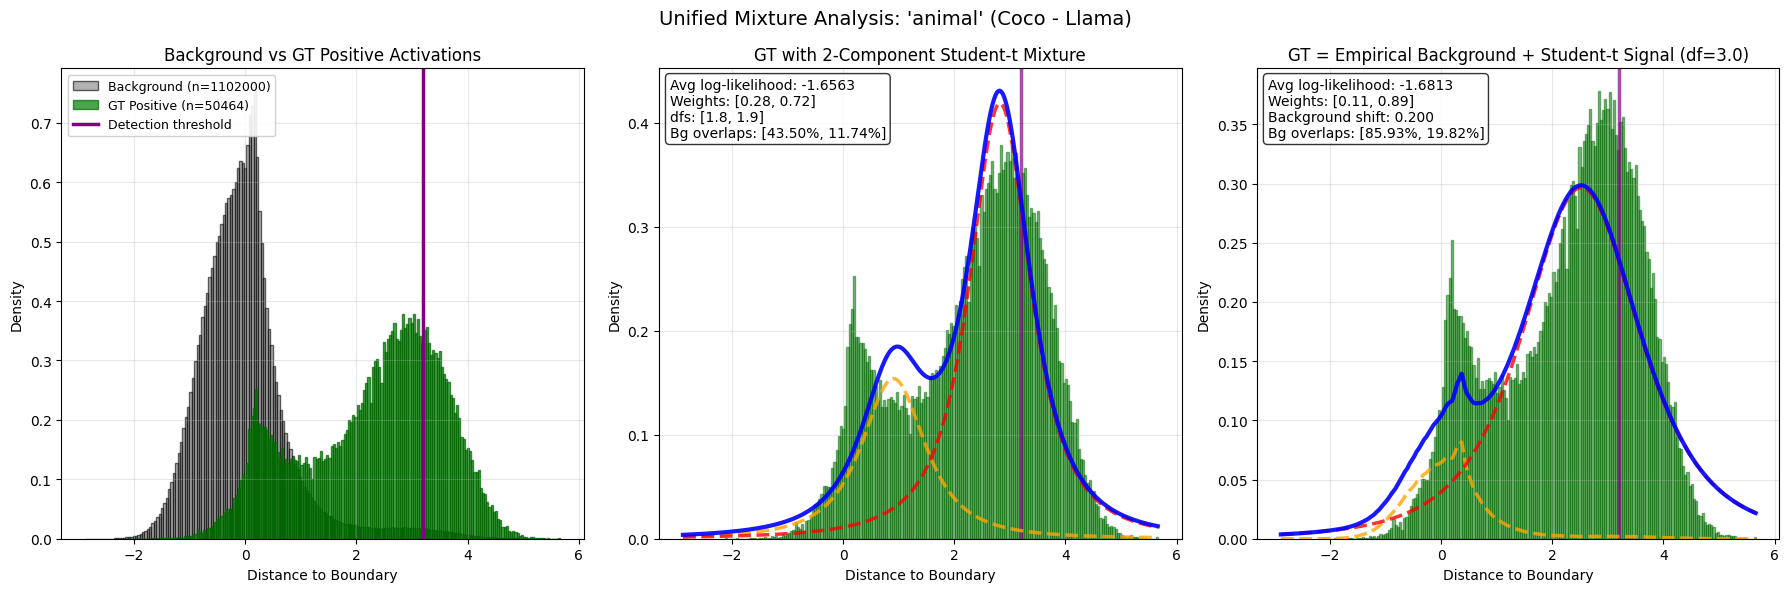


--- Processing concept 3/6: 'food' ---
  Found 200300 positive patches
  Filtered out 430920 padding patches from background
  GT positive: 36323 samples, Background: 1121080 samples
  Running student-t mixture modeling...
  Running background + signal decomposition with empirical distribution...
    Using fast histogram approximation for 1121080 background samples...
    Finding optimal background shift...
    Optimal shift: 0.200
  Creating visualization...


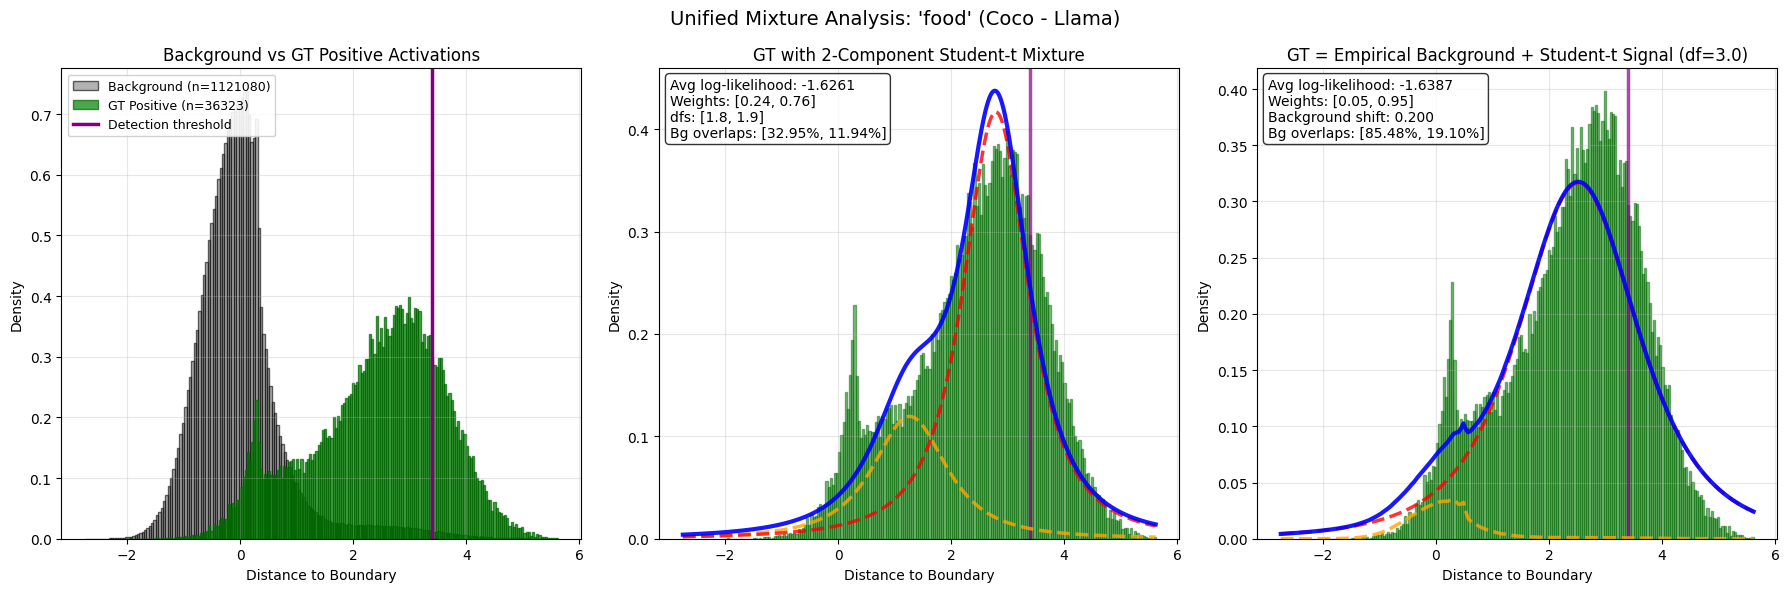


--- Processing concept 4/6: 'electronic' ---
  Found 90965 positive patches
  Filtered out 434120 padding patches from background
  GT positive: 14842 samples, Background: 1132280 samples
  Running student-t mixture modeling...
  Running background + signal decomposition with empirical distribution...
    Using fast histogram approximation for 1132280 background samples...
    Finding optimal background shift...
    Optimal shift: 0.200
  Creating visualization...


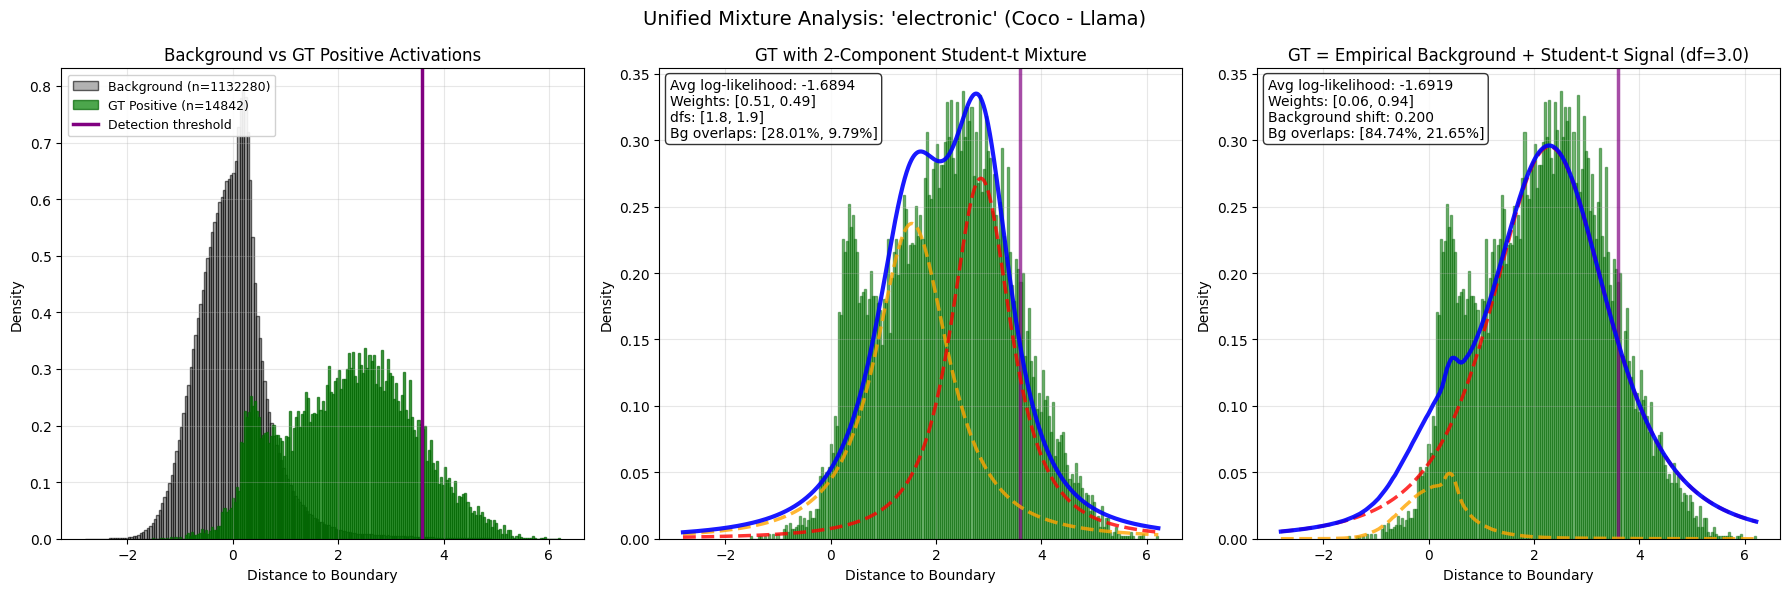


--- Processing concept 5/6: 'train' ---
  Found 57269 positive patches
  Filtered out 441200 padding patches from background
  GT positive: 9635 samples, Background: 1150800 samples
  Running student-t mixture modeling...
  Running background + signal decomposition with empirical distribution...
    Using fast histogram approximation for 1150800 background samples...
    Finding optimal background shift...
    Optimal shift: 0.200
  Creating visualization...


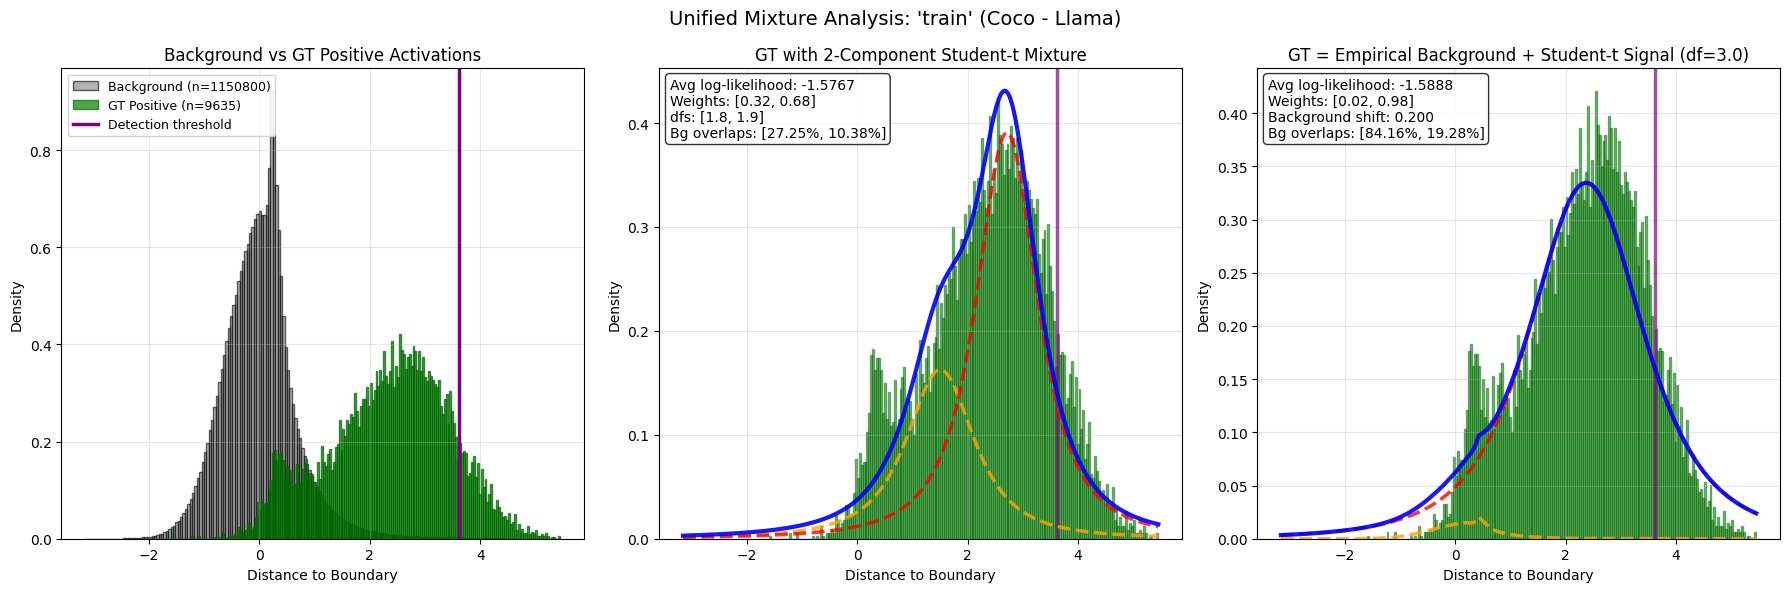


--- Processing concept 6/6: 'bus' ---
  Found 59715 positive patches
  Filtered out 440120 padding patches from background
  GT positive: 12488 samples, Background: 1147080 samples
  Running student-t mixture modeling...
  Running background + signal decomposition with empirical distribution...
    Using fast histogram approximation for 1147080 background samples...
    Finding optimal background shift...
    Optimal shift: 0.200
  Creating visualization...


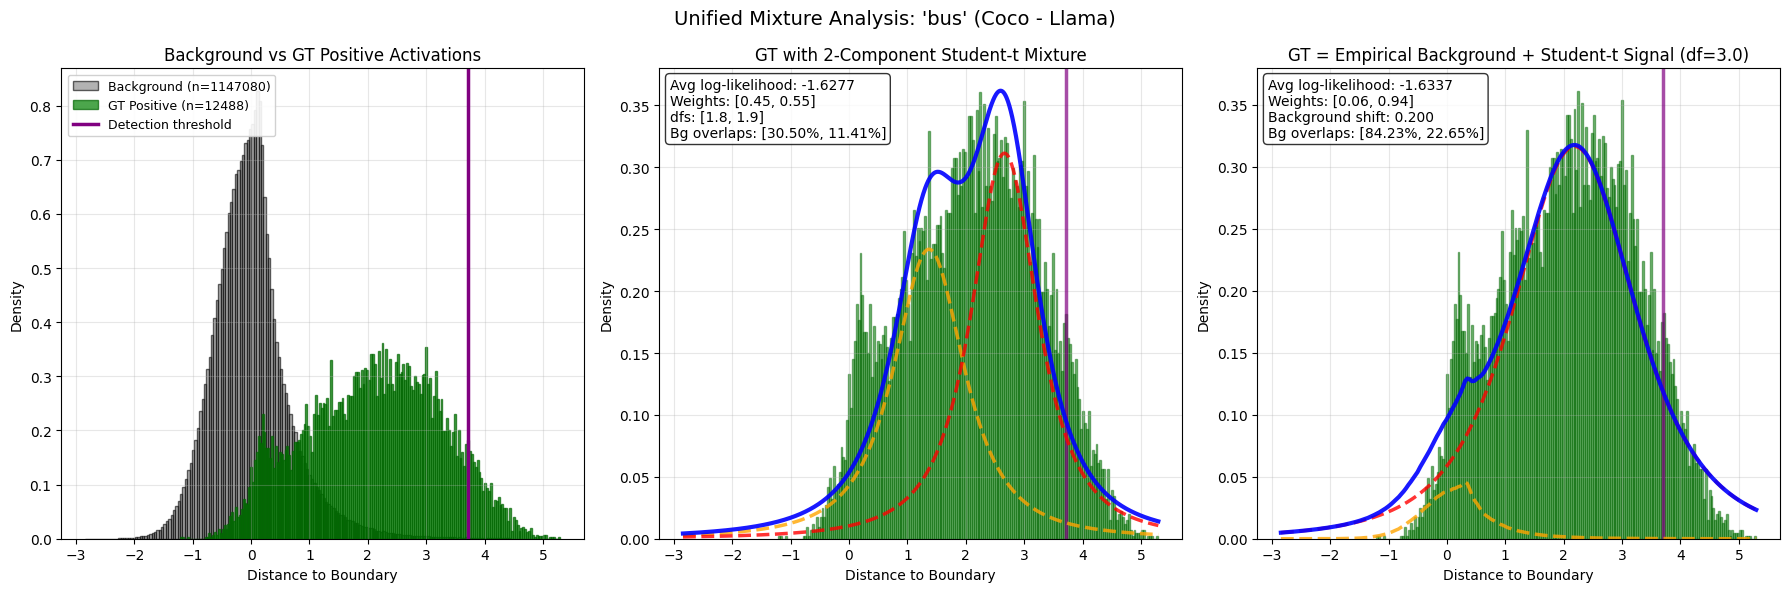


=== Analysis complete ===

Summary:
  Total concepts analyzed: 6
  Successful analyses: 6


In [349]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import analyze_concept_unified_mixture_decomposition
results = analyze_concept_unified_mixture_decomposition(
  concepts=curr_concepts,
  dataset_name=DATASET_NAME,
  model_name=MODEL_NAME,
  concept_type=CONCEPT_TYPE,
  signal_dist='student-t',
  scratch_dir=SCRATCH_DIR
)

# Distribution of Images that Have at Least One Patch Greater than 98% of Background

In [ ]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import compute_background_threshold_detection_stats
results = compute_background_threshold_detection_stats(
      dataset_name=DATASET_NAME,
      model_name=MODEL_NAME,
      concept_type=CONCEPT_TYPE,
      sample_type='patch',
      scratch_dir=SCRATCH_DIR,
      percentthrumodel=100
  )

## Over Percentiles

In [ ]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import compute_superdetector_detection_over_percentthru,  plot_superdetector_detection_results

# Plot superdetector detection rates across layers
detection_rates = compute_superdetector_detection_over_percentthru(
  dataset_name=DATASET_NAME,
  model_name=MODEL_NAME,
  concept_type=CONCEPT_TYPE,
  model_input_size=MODEL_INPUT_SIZE,
  background_percentile=0.99,  
  scratch_dir=SCRATCH_DIR
)

In [ ]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import plot_superdetector_detection_results
is_text_dataset = (MODEL_INPUT_SIZE[0] == 'text')

plot_superdetector_detection_results(
  superdetector_detection_rates=detection_rates,
  dataset_name=DATASET_NAME,
  model_name=MODEL_NAME,
  concept_type=CONCEPT_TYPE,
  background_percentile=0.99,
  is_text_dataset=is_text_dataset,
  show_plot=True,
  plot_type='line',
  save_path='../Figs/Paper_Figs/coco_llama_more_than_background_spread.pdf',
  figsize=(2.75, 2),
  label_size=9,
  use_layer_numbers=False,
  custom_ylabel="",
  custom_title="% True-Concept Images w/ \n Patch >99% Background"
)

## Over Percentiles for n% MOST activated

In [59]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import compute_top_gt_detection_over_percentthru
# Compute top GT detection rates

results = compute_top_gt_detection_over_percentthru(
  dataset_name=DATASET_NAME,
  model_name=MODEL_NAME,
  concept_type=CONCEPT_TYPE,
  model_input_size=MODEL_INPUT_SIZE,
  scratch_dir=SCRATCH_DIR,
  gt_top_percentiles=[0.01, 0.02, 0.05, 0.10], 
  use_gpu=True
)


=== Computing Top GT Detection Over Layers ===
Dataset: Coco, Model: Llama
Analyzing top [1.0, 2.0, 5.0, 10.0]% of GT activations
Using device: cuda
Loading ground truth data...
Processing 29 concepts


Processing layers:   0% 0/9 [00:00<?, ?it/s]

  Top 1.0% at layer 2%: 0.254
  Top 2.0% at layer 2%: 0.349
  Top 5.0% at layer 2%: 0.516


Processing layers:  11% 1/9 [00:12<01:40, 12.62s/it]

  Top 10.0% at layer 2%: 0.659
  Top 1.0% at layer 15%: 0.255
  Top 2.0% at layer 15%: 0.343
  Top 5.0% at layer 15%: 0.483


Processing layers:  22% 2/9 [00:24<01:24, 12.13s/it]

  Top 10.0% at layer 15%: 0.614
  Top 1.0% at layer 28%: 0.228
  Top 2.0% at layer 28%: 0.309
  Top 5.0% at layer 28%: 0.444


Processing layers:  33% 3/9 [00:36<01:11, 11.98s/it]

  Top 10.0% at layer 28%: 0.567
  Top 1.0% at layer 40%: 0.238
  Top 2.0% at layer 40%: 0.321
  Top 5.0% at layer 40%: 0.464


Processing layers:  44% 4/9 [00:47<00:59, 11.87s/it]

  Top 10.0% at layer 40%: 0.590
  Top 1.0% at layer 52%: 0.272
  Top 2.0% at layer 52%: 0.355
  Top 5.0% at layer 52%: 0.504


Processing layers:  56% 5/9 [00:59<00:47, 11.80s/it]

  Top 10.0% at layer 52%: 0.644
  Top 1.0% at layer 65%: 0.352
  Top 2.0% at layer 65%: 0.485
  Top 5.0% at layer 65%: 0.673


Processing layers:  67% 6/9 [01:11<00:35, 11.78s/it]

  Top 10.0% at layer 65%: 0.792
  Top 1.0% at layer 78%: 0.376
  Top 2.0% at layer 78%: 0.493
  Top 5.0% at layer 78%: 0.642


Processing layers:  78% 7/9 [01:23<00:23, 11.82s/it]

  Top 10.0% at layer 78%: 0.760
  Top 1.0% at layer 90%: 0.368
  Top 2.0% at layer 90%: 0.466
  Top 5.0% at layer 90%: 0.625


Processing layers:  89% 8/9 [01:34<00:11, 11.78s/it]

  Top 10.0% at layer 90%: 0.747
  Top 1.0% at layer 100%: 0.367
  Top 2.0% at layer 100%: 0.477
  Top 5.0% at layer 100%: 0.640


Processing layers: 100% 9/9 [01:46<00:00, 11.81s/it]

  Top 10.0% at layer 100%: 0.753


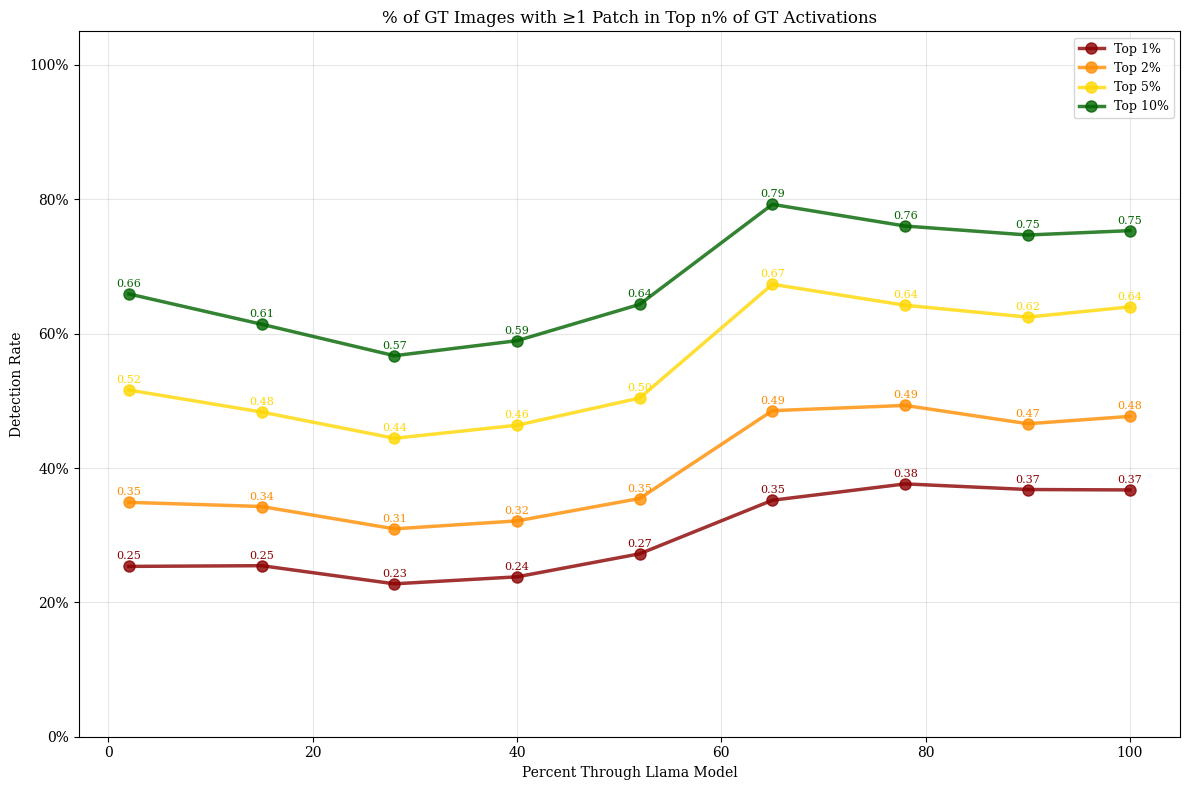

In [60]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import plot_top_gt_detection_results

# Plot the results
plot_top_gt_detection_results(
  results_by_percentile=results,
  dataset_name=DATASET_NAME,
  model_name=MODEL_NAME,
  concept_type=CONCEPT_TYPE,
  save_path='',
  show_plot=True
)

# Paper Stuff- What I Want at Once

In [30]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import compute_separation_over_percentthru

# Compute separation metrics
results = compute_separation_over_percentthru(
  dataset_name=DATASET_NAME,
  model_name=MODEL_NAME,
  concept_type=CONCEPT_TYPE,
  metrics_to_compute=[],
  scratch_dir=SCRATCH_DIR,
  model_input_size=MODEL_INPUT_SIZE,
  compute_superdetector_separation=False,
  background_percentile=0.99,
  compute_background_detection=True, 
)


=== Computing concept separation metrics ===
Dataset: Broden-OpenSurfaces, Model: Llama
Concept type: linsep_patch_embeddings_BD_True_BN_False
Metrics to compute: []
Using percentthrumodel values: [2, 15, 28, 40, 52, 65, 78, 90, 100]

Loading ground truth data...
Found 26 concepts
Processing all 26 concepts
Using device: cuda

--- Processing percentthrumodel 2 ---

--- Processing percentthrumodel 15 ---

--- Processing percentthrumodel 28 ---

--- Processing percentthrumodel 40 ---

--- Processing percentthrumodel 52 ---

--- Processing percentthrumodel 65 ---

--- Processing percentthrumodel 78 ---

--- Processing percentthrumodel 90 ---

--- Processing percentthrumodel 100 ---


/path/to/concept_inversion/Experiments/utils/activation_distributions_utils.py:9818: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.08, 0.14 if show_legend else 0, 1, 0.94], h_pad=0.5, w_pad=0.5)


Saved figure to: ../Figs/Paper_Figs/Llama_activation_distributions_grid.pdf


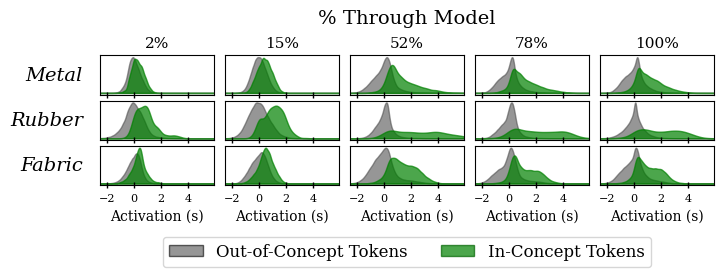

In [303]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import plot_activation_distributions_grid

# Step 2a: Plot histogram grid (like original plot_concept_activation_grid)
plot_activation_distributions_grid(
  computation_results=results,
  concepts = ['material::metal', 'material::rubber', 'material::fabric'],
  # concepts = ['joy', 'sadness'],
  concept_xlims = (-2.5, 5.9),
  percentthrumodels=[2, 15, 52, 78, 100],
  xlabel_size = 10,
  figsize=(7, 2),
  label_size=12,
  legend_size=12,
  percent_size=11,
  concept_size=14,
  show_thresholds=False,
  show_metrics=True,  # Shows Sep, d, and AUC values on each plot
  plot_type='density',
  save_path=f'../Figs/Paper_Figs/{MODEL_NAME}_activation_distributions_grid.pdf'
)

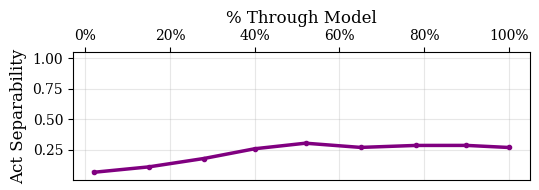

In [318]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import plot_true_concept_tokens_above_threshold
plot_true_concept_tokens_above_threshold(
      results,
      background_percentile=0.99,  
      custom_ylabel = 'Act Separability',
      plot_individual_concepts=False,
      figsize=(5.5, 2)
)

Saved figure to: ../Figs/Paper_Figs/avg_background_detection.pdf


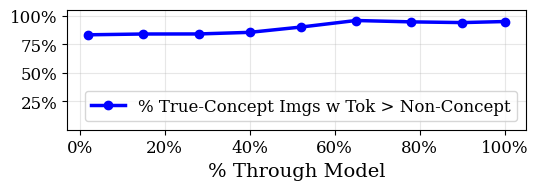

In [218]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import plot_background_detection_rates
plot_background_detection_rates(
      computation_results=results,
      figsize=(5.5, 2),
      save_path='../Figs/Paper_Figs/avg_background_detection.pdf',
      plot_individual_concepts=False,
      label_size=14,
      legend_text='% True-Concept Imgs w Tok > Non-Concept',
      custom_title='',
      custom_ylabel='',
      highlight_percentile=True  # Shows ">(98.0th percentile of background)" in title
  )

Saved figure to: ../Figs/Paper_Figs/mass_above_background.pdf


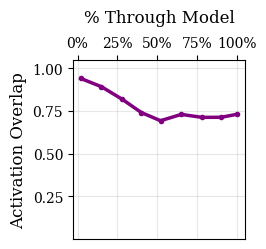

In [350]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import plot_gt_mass_above_threshold

plot_gt_mass_above_threshold(
      computation_results=results,
      figsize=(2.75, 2.6),
      save_path='../Figs/Paper_Figs/mass_above_background.pdf',
      plot_individual_concepts=False,
      label_size=12,
      custom_ylabel='Activation Overlap',
      legend_text='',
      custom_title='',
      overlap_framing=True,
  )

Computed overlap for 26 concepts
Average overlap values: ['0.623', '0.538', '0.429', '0.348', '0.334', '0.450', '0.426', '0.420', '0.453']

Overlap values for selected concepts:
Percentthrumodels: [2, 15, 28, 40, 52, 65, 78, 90, 100]
material::metal: ['0.778', '0.709', '0.596', '0.488', '0.447', '0.553', '0.497', '0.475', '0.515']
material::rubber: ['0.561', '0.468', '0.394', '0.332', '0.295', '0.349', '0.339', '0.341', '0.364']
material::fabric: ['0.725', '0.674', '0.555', '0.443', '0.410', '0.509', '0.505', '0.503', '0.531']


/path/to/concept_inversion/Experiments/utils/activation_distributions_utils.py:11718: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved figure to: ../Figs/Paper_Figs/hists_and_overlap.pdf


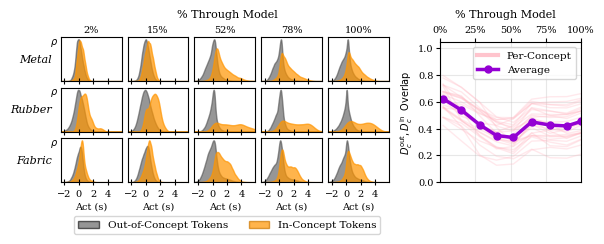

In [86]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import plot_combined_distributions_and_gt_mass

plot_combined_distributions_and_gt_mass(
  results,
  concepts=['material::metal', 'material::rubber', 'material::fabric'],
  plot_individual_concepts_mass=True,
  percentthrumodels=[2, 15, 52, 78, 100],
  header_size=8,    
  label_size=7,    
  concept_size=8,  
  legend_size=7.5,  
  overlap_framing=True,
  all_concepts=True,
  figsize=(5.5, 1.75),
  concept_xlims = (-2.5, 5.9),
  plot_type='density',
  show_thresholds=False,
  custom_ylabel_mass=r"$D_c^{\text{out}}, D_c^{\text{in}} \;\; \text{Overlap}$",  # No y-label for mass plot
  legend_text_mass="",
  save_path='../Figs/Paper_Figs/hists_and_overlap.pdf',
)

## Not at once

In [203]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
import utils.compute_thresholded_metrics
import utils.activation_distributions_utils
importlib.reload(utils.compute_thresholded_metrics)
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import compute_overlap_across_layers_data

# Compute the metrics
results = compute_overlap_across_layers_data(
  datasets=['Sarcasm', 'iSarcasm', 'GoEmotions'],
  models=['Llama', 'Qwen', 'Gemma'],
  concept_types=['avg', 'linsep'],
  background_percentile=0.99,  # 99th percentile,
  scratch_dir=SCRATCH_DIR
)

Llama Sarcasm avg: 100% 8/8 [00:11<00:00,  1.44s/it]
Llama Sarcasm linsep: 100% 8/8 [00:11<00:00,  1.46s/it]
Llama iSarcasm avg: 100% 8/8 [00:12<00:00,  1.56s/it]
Llama iSarcasm linsep: 100% 8/8 [00:12<00:00,  1.54s/it]
Llama GoEmotions avg: 100% 8/8 [00:24<00:00,  3.09s/it]
Llama GoEmotions linsep: 100% 8/8 [00:24<00:00,  3.07s/it]
Qwen Sarcasm avg: 100% 8/8 [00:11<00:00,  1.45s/it]
Qwen Sarcasm linsep: 100% 8/8 [00:11<00:00,  1.42s/it]
Qwen iSarcasm avg: 100% 8/8 [00:12<00:00,  1.52s/it]
Qwen iSarcasm linsep: 100% 8/8 [00:12<00:00,  1.52s/it]
Qwen GoEmotions avg: 100% 8/8 [00:24<00:00,  3.09s/it]
Qwen GoEmotions linsep: 100% 8/8 [00:24<00:00,  3.06s/it]
Gemma Sarcasm avg: 100% 7/7 [00:10<00:00,  1.44s/it]
Gemma Sarcasm linsep: 100% 7/7 [00:10<00:00,  1.46s/it]
Gemma iSarcasm avg: 100% 7/7 [00:10<00:00,  1.55s/it]
Gemma iSarcasm linsep: 100% 7/7 [00:10<00:00,  1.55s/it]
Gemma GoEmotions avg: 100% 7/7 [00:21<00:00,  3.11s/it]
Gemma GoEmotions linsep: 100% 7/7 [00:22<00:00,  3.15s/it]


In [52]:
import utils.save_load_thresholded_metrics
importlib.reload(utils.save_load_thresholded_metrics)
from utils.save_load_thresholded_metrics import save_thresholded_metrics_results, load_thresholded_metrics_results
# save_thresholded_metrics_results(results, save_path="Quant_Results/all_overlap_data_text.pt")

image_results, metadata = load_thresholded_metrics_results("Quant_Results/all_overlap_data.pt")
text_results, metadata = load_thresholded_metrics_results("Quant_Results/all_overlap_data_text.pt")

Loaded results from: Quant_Results/all_overlap_data.pt
  - Timestamp: 2025-09-18T22:27:11.773135
  - 34 configurations
  - Datasets: Broden-OpenSurfaces, Broden-Pascal, CLEVR, Coco, GoEmotions, Sarcasm, iSarcasm
  - Models: CLIP, Gemma, Llama, Qwen
Loaded results from: Quant_Results/all_overlap_data_text.pt
  - Timestamp: 2025-09-19T01:59:12.911782
  - 18 configurations
  - Datasets: GoEmotions, Sarcasm, iSarcasm
  - Models: Gemma, Llama, Qwen


Figure saved to ../Figs/Paper_Figs/Broden-Pascal_gt_mass_detection_overlap.pdf


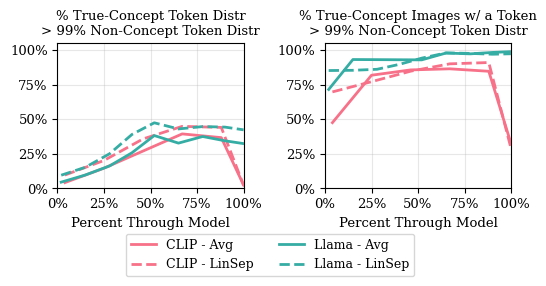

In [232]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import plot_gt_mass_and_detection_side_by_side

plot = plot_gt_mass_and_detection_side_by_side(
    results=image_results,
    dataset='Broden-Pascal',
    models=['CLIP', 'Llama'],
    concept_types =['avg', 'linsep'],
    left_label='% True-Concept Token Distr\n> 99% Non-Concept Token Distr',
    right_label='% True-Concept Images w/ a Token\n> 99% Non-Concept Token Distr',
    text_size=9.5,
    legend_size=9,
    figsize = (5.5, 2.5),
    show_error_bars=False,
    save_file=True
)

Figure saved to: /path/to/concept_inversion/Figs/Paper_Figs/OpenSurfaces_coverage.pdf


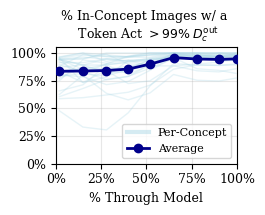

In [95]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import  plot_detection_rates_per_concept
fig = plot_detection_rates_per_concept(
      results=image_results,
      dataset='Broden-OpenSurfaces',
      model='Llama',
      concept_type='linsep',
      text_size=9,
      legend_size=8,
      save_path='../Figs/Paper_Figs/OpenSurfaces_coverage.pdf',  # optional
      title="% In-Concept Images w/ a \n Token Act $> 99\\%\\; D_c^{\\mathrm{out}}$",  # optional custom title
      figsize=(2.75, 2.25),  # optional custom size
  )

In [25]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import compute_background_detection_across_layers_data

# Step 1: Compute background detection data
results = compute_background_detection_across_layers_data(
  datasets=['Broden-OpenSurfaces'],
  models=['Llama', 'CLIP', 'Qwen', 'Gemma'],
  concept_types=['avg', 'linsep'],
  sample_type='patch',
  background_percentile=0.995,  # 99.5th percentile
  validation_split='cal'
)


NameError: name 'DATASET_TO_CONCEPTS' is not defined

In [23]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import plot_background_detection_across_layers
# Step 2: Plot the results
fig = plot_background_detection_across_layers(
  results,
  datasets=['CLEVR', 'Coco', 'Broden-Pascal', 'Broden-OpenSurfaces'],  # Only plot CLEVR
  models=['CLIP'],
  save_path=None,
  plot_gt_mass=False,  # Plot detection rates (set True for GT mass)
  show_error_bars=False,
  title='Background Detection Rates Across Layers'
)

NameError: name 'results' is not defined

## Sample w Activations

Loading ground truth data for GoEmotions...
Loading activations...
Computing global test set distributions...
Global distributions - Positive: 2694, Negative: 100000
Added optimal threshold from calibration: 2.3870
Saved figure to: ../Figs/Paper_Figs/GoEmotions_Qwen_sample.pdf


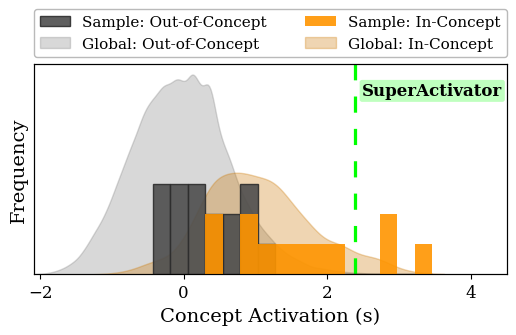

In [89]:
import utils.activation_distributions_utils
importlib.reload(utils.activation_distributions_utils)
from utils.activation_distributions_utils import plot_single_sample_activation_distribution

#2579 5213 curiosity
#193 5252 admiration
#1586 1741 1805 joy

results2 = plot_single_sample_activation_distribution(
  sample_index=1805,  # Image index
  concept_name='joy',
  dataset_name=DATASET_NAME,
  model_name=MODEL_NAME,
  scratch_dir=SCRATCH_DIR,
  concept_type=CONCEPT_TYPE,
  model_input_size=MODEL_INPUT_SIZE,
  percentthrumodel=100,
  x_lim=(-2.09, 4.5),
  figsize=(5.5, 3),
  fontsize=14,
  legendsize=11,
  show_plot=True,
  show_stats=False,
  show_global=True,
  count_max=7,
  n_bins=16,
  save_path=f'../Figs/Paper_Figs/{DATASET_NAME}_{MODEL_NAME}_sample.pdf')
